# Внимание!

Для использования и запсука данного ноутбука нужно выкачать zip-архивы для тестово-валидационной выборки и тестовой в колаб.

Поменять пути для распаковки в программе.

Пользоваться


<a id='Main'></a>
# Оглавление

1. [Работа с данными](#Work_with_data)
    - [Монтируем к jupyter notebook google drive](#Mount_googleDrive)
    - [Распаковка датасетов в папки](#Unzip_data)
    - [Подгрузка torch](#Import_torch)
    - [Догрузка дополнительных библиотек](#Import_all_librariries)
    - [Объявление глобальных переменных](#Globals)
    - [Подготовка данных](#Prepare_data)
    - [Отрисовка данных](#Draw_data)
    
    
2. [Смотрим на качество моделей при обучении на данных без дополнительной обработки](#Work_with_models)    
Обучены модели AlexNet и VGG16 на данных без подготовки      
    - [Модель AlexNet с одним полносвязным слоем](#AlexNet_simple_data)
        - [Обучение модели](#AlexNet_simple_data_learn)
        - [Отрисовка графиков для AlexNet](#AlexNet_simple_data_draw)
        - [Выводы из графиков и результатов расчетов](#AlexNet_simple_data_summary)
    - [Модель VGG16](#VGG16_simple_data)
        - [Обучение модели](#VGG16_simple_data_learn)
        - [Строим графики для VGG16](#VGG16_simple_data_draw)
        - [Выводы из графиков и результатов расчетов](#VGG16_simple_data_summary)
    - [Модель AlexNet с двумя полносвязными слоями](#AlexNet_tuning_simple_data)
        - [Обучение модели](#AlexNet_tuning_simple_data_learn)
        - [Строим графики для AlexNet с тюнингом параметров](#AlexNet_tuning_simple_data_draw)
        - [Выводы из графиков и результатов расчетов](#AlexNet_tuning_simple_data_summary)
        
        
3. [Преобразование картинок в классах. Пересэмплирование](#Prepare_data_best_Oversampling)   
Использована модель AlexNet на данных, на которых был применено пересэмплирование (Oversampling the minority class). Объекты с малым количеством представителей обрабатывались с помощью torchvision.transforms так, чтобы представителей стало сравнимо с представителями максимального класса     
    - [Делаем всю необходимую работу](#Prepare_data_best_Oversampling_prepare)
        - [Получаем словарь всех классов](#Prepare_data_best_Oversampling_dict)
        - [Использование torchvision.transforms](#Prepare_data_best_Oversampling_transforms) 
        - [Обновление переменных](#Update_parameters_Oversampling_update)
    - [Модель AlexNet с одним полносвязным слоем и оптимизатором Adam](#Update_parameters_Oversampling_Alex_Adam)
        - [Обучение модели](#Update_parameters_Oversampling_Alex_Adam_learn)
        - [Смотрим на графики для модели](#Update_parameters_Oversampling_Alex_Adam_draw)
        - [Выводы из графиков и результатов расчетов](#Update_parameters_Oversampling_Alex_Adam_summary)
    -[Модель AlexNet с одним полносвязным слоем и оптимизатором AdamW](#Update_parameters_Oversampling_Alex_AdamW)
        - [Обучение модели](#Update_parameters_Oversampling_Alex_AdamW_learn)
        - [Смотрим на графики для модели](#Update_parameters_Oversampling_Alex_AdamW_draw)
        - [Выводы из графиков и результатов расчетов](#Update_parameters_Oversampling_Alex_AdamW_summary)
    -[Модель AlexNet с одним полносвязным слоем и оптимизатором SGD](#Update_parameters_Oversampling_Alex_SGD)
        - [Обучение модели](#Update_parameters_Oversampling_Alex_SGD_learn)
        - [Смотрим на графики для модели](#Update_parameters_Oversampling_Alex_SGD_draw)
        - [Выводы из графиков и результатов расчетов](#Update_parameters_Oversampling_Alex_SGD_summary)
    -[Модель AlexNet с двумя полносвязными слоями](#Update_parameters_Oversampling_Alex_twofull)
        - [Обучение модели](#Update_parameters_Oversampling_Alex_twofull_learn)
        - [Смотрим на графики для модели](#Update_parameters_Oversampling_Alex_twofull_draw)
        - [Выводы из графиков и результатов расчетов](#Update_parameters_Oversampling_Alex_twofull_summary)
        
4. [Преобразование картинок в классах. Недосэмлирование](#Prepare_data_best_Undersampling)       
Использована модель AlexNet на данных, на которых был применено недосэмлирование (Undersampling the majority class). Количество представителей в каждом классе выравнивалось до одинакового значения (примерно 550), где это было возможно. (Преобразовываться будут изначальные данные, т.е. не будут использоваться данные после пункта 3. Это говорит о том, что нужно будет заново все подключать)      
    - [Делаем всю необходимую работу](#Prepare_data_best_Undersampling_prepare)
        - [Делаем очистку данных по уровню в 550 записей в одном признаке применяя распределение Бернулли](#Prepare_data_best_Undersampling_bernoulli)
        - [Получаем словарь всех классов](#Prepare_data_best_Undersampling_dict)
        - [Использование torchvision.transforms](#Prepare_data_best_Undersampling_transforms) 
        - [Обновление переменных](#Update_parameters_Undersampling_update)
        - [Делаем очистку данных по уровню в 550 записей в одном признаке применяя распределение Бернулли к готовому датасету](#Update_parameters_Undersampling_bernoulli_final)
        - [Отрисовка готового датасета по количеству данных для каждого класса](#Update_parameters_Undersampling_data_final)
        - [Отрисовка рандомных преобразованных изображений из нового датасета](#Update_parameters_Undersampling_data_final_draw) 
    - [Модель AlexNet с одним полносвязным слоем и оптимизатором Adam](#Update_parameters_Undersampling_Alex_Adam)
        - [Обучение модели](#Update_parameters_Undersampling_Alex_Adam_learn)
        - [Смотрим на графики для модели](#Update_parameters_Undersampling_Alex_Adam_draw)
        - [Выводы из графиков и результатов расчетов](#Update_parameters_Undersampling_Alex_Adam_summary)
    -[Модель AlexNet с одним полносвязным слоем и оптимизатором AdamW](#Update_parameters_Undersampling_Alex_AdamW)
        - [Обучение модели](#Update_parameters_Undersampling_Alex_AdamW_learn)
        - [Смотрим на графики для модели](#Update_parameters_Undersampling_Alex_AdamW_draw)
        - [Выводы из графиков и результатов расчетов](#Update_parameters_Undersampling_Alex_AdamW_summary)
    -[Модель AlexNet с одним полносвязным слоем и оптимизатором SGD](#Update_parameters_Undersampling_Alex_SGD)
        - [Обучение модели](#Update_parameters_Undersampling_Alex_SGD_learn)
        - [Смотрим на графики для модели](#Update_parameters_Undersampling_Alex_SGD_draw)
        - [Выводы из графиков и результатов расчетов](#Update_parameters_Undersampling_Alex_SGD_summary)
    -[Модель AlexNet с двумя полносвязными слоями](#Update_parameters_Undersampling_Alex_twofull)
        - [Обучение модели](#Update_parameters_Undersampling_Alex_twofull_learn)
        - [Смотрим на графики для модели](#Update_parameters_Undersampling_Alex_twofull_draw)
        - [Выводы из графиков и результатов расчетов](#Update_parameters_Undersampling_Alex_twofull_summary)
        
5. [Время предсказаний](#Predict)


Используемая идея - Transfer Learning
Используемые модели - AlexNet, VGG16

Модели обучены на картинках из ImageNet => Нет большого смысла итерироваться по 
эпохам (буду использовать не больше 5), лучше поработать со сверточными слоями


<a id='Work_with_data'></a>

# Работа с данными

[Перейти к "Оглавлению"](#Main)

<a id='Mount_googleDrive'></a>

### Монтируем к jupyter notebook google drive

[Перейти к "Оглавлению"](#Main)

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


<a id='Unzip_data'></a>

### Распаковка датасетов в папки

[Перейти к "Оглавлению"](#Main)

In [ ]:
!unzip -q /content/drive/MyDrive/DeepLearningSchool/Image_classification/data_hw/trainset.zip -d train
!unzip -q /content/drive/MyDrive/DeepLearningSchool/Image_classification/data_hw/testset.zip -d test
!ls

drive  sample_data  test  train


<a id='Import_torch'></a>

### Подгрузка torch

[Перейти к "Оглавлению"](#Main)

In [ ]:
!nvidia-smi

Sat Nov 27 14:27:11 2021       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 495.44       Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla K80           Off  | 00000000:00:04.0 Off |                    0 |
| N/A   73C    P8    34W / 149W |      0MiB / 11441MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [ ]:
import torch
torch.cuda.is_available()

True

<a id='Import_all_librariries'></a>

### Догрузка дополнительных библиотек

[Перейти к "Оглавлению"](#Main)

In [ ]:
import pickle
import time
import numpy as np
from skimage import io

from tqdm import tqdm, tqdm_notebook
from tqdm.autonotebook import tqdm, trange
from PIL import Image
from pathlib import Path

from torchvision import datasets, models, transforms
from multiprocessing.pool import ThreadPool
from sklearn.preprocessing import LabelEncoder
from torch.utils.data import Dataset, DataLoader
import torch.nn as nn
import torch.optim as optim
from torch.optim import lr_scheduler

from collections import OrderedDict

from matplotlib import colors, pyplot as plt
%matplotlib inline

# в sklearn не все гладко, чтобы в colab удобно выводить картинки 
# мы будем игнорировать warnings
import warnings
warnings.filterwarnings(action='ignore', category=DeprecationWarning)

<a id='Globals'></a>

### Объявление глобальных переменных

[Перейти к "Оглавлению"](#Main)

In [ ]:
# разные режимы датасета 
DATA_MODES = ['train', 'val', 'test']
# все изображения будут масштабированы к размеру 224x224 px
RESCALE_SIZE = 224
# работаем на видеокарте
DEVICE = torch.device("cuda")

<a id='Prepare_data'></a>

### Подготовка данных

[Перейти к "Оглавлению"](#Main)

In [ ]:
class SimpsonsDataset(Dataset):
    """
    Датасет с картинками, который паралельно подгружает их из папок
    производит скалирование и превращение в торчевые тензоры
    """
    def __init__(self, files, mode):
        super().__init__()
        # список файлов для загрузки
        self.files = sorted(files)
        # режим работы
        self.mode = mode

        if self.mode not in DATA_MODES:
            print(f"{self.mode} is not correct; correct modes: {DATA_MODES}")
            raise NameError

        self.len_ = len(self.files)
     
        self.label_encoder = LabelEncoder()

        if self.mode != 'test':
            self.labels = [path.parent.name for path in self.files]
            self.label_encoder.fit(self.labels)

            with open('label_encoder.pkl', 'wb') as le_dump_file:
                  pickle.dump(self.label_encoder, le_dump_file)
                      
    def __len__(self):
        return self.len_
      
    def load_sample(self, file):
        image = Image.open(file)
        image.load()
        return image
  
    def __getitem__(self, index):
        # для преобразования изображений в тензоры PyTorch и нормализации входа
        transform = transforms.Compose([     
            transforms.ToTensor(),
            transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
        ])
        x = self.load_sample(self.files[index])
        x = self._prepare_sample(x)
        x = np.array(x / 255, dtype='float32')
        x = transform(x)
        if self.mode == 'test':
            return x
        else:
            label = self.labels[index]
            label_id = self.label_encoder.transform([label])
            y = label_id.item()
            return x, y
        
    def _prepare_sample(self, image):
        image = image.resize((RESCALE_SIZE, RESCALE_SIZE))
        return np.array(image)

<a id='Draw_data'></a>

### Отрисовка данных

[Перейти к "Оглавлению"](#Main)

In [ ]:
def imshow(inp, title=None, plt_ax=plt, default=False):
    """Imshow для тензоров"""
    inp = inp.numpy().transpose((1, 2, 0))
    mean = np.array([0.485, 0.456, 0.406])
    std = np.array([0.229, 0.224, 0.225])
    inp = std * inp + mean
    inp = np.clip(inp, 0, 1)
    plt_ax.imshow(inp)
    if title is not None:
        plt_ax.set_title(title)
    plt_ax.grid(False)

<a id='Work_with_models'></a>

# Смотрим на качество моделей при обучении на данных без дополнительной обработки

[Перейти к "Оглавлению"](#Main)

### Создание выборок для обучения+валидации и тестовой для отправки предсказаний на kaggle

In [ ]:
# Создание двух выборок
TRAIN_DIR = Path('/content/train')
TEST_DIR = Path('/content/test')

# Добавляет в переменную файлы из директории
train_val_files = sorted(list(TRAIN_DIR.rglob('*.jpg')))
test_files = sorted(list(TEST_DIR.rglob('*.jpg')))

print(len(train_val_files))

20933


In [ ]:
# Создание тренировочной и тестовой выборок
from sklearn.model_selection import train_test_split

train_val_labels = [path.parent.name for path in train_val_files]
train_files, val_files = train_test_split(train_val_files, test_size=0.25, \
                                          stratify=train_val_labels, random_state=257)

In [ ]:
# Функция для расчетов с использованием f1_score

from sklearn.metrics import f1_score

def train_model(model, criterion, optimizer, scheduler, num_epochs=5):
    since = time.time()

    best_model_wts = model.state_dict()
    best_acc = 0.0
    
    #Ваш код здесь
    losses = {'train': [], "val": []}
    f1_metric = {'train': [], "val": []}
    accuracy_metric = {'train': [], "val": []}

    pbar = trange(num_epochs, desc="Epoch:")

    for epoch in pbar:

        # каждя эпоха имеет обучающую и тестовую стадии
        for phase in ['train', 'val']:
            if phase == 'train':
                scheduler.step()
                model.train(True)  # установаить модель в режим обучения
            else:
                model.eval()

            running_loss = 0.0
            running_corrects = 0
            running_f1_pred = []
            running_f1_true = []
            running_f1 = {}

            # итерируемся по батчам
            for data in tqdm(dataloaders[phase], leave=False, desc=f"{phase} iter:"):
                # получаем картинки и метки
                inputs, labels = data

                # оборачиваем в переменные
                if use_gpu:
                    inputs = inputs.cuda()
                    labels = labels.cuda()
                else:
                    inputs, labels = inputs, labels

                # инициализируем градиенты параметров
                if phase=="train":
                    optimizer.zero_grad()

                # forward pass
                if phase == "eval":
                    with torch.no_grad():
                        outputs = model(inputs)
                else:
                    outputs = model(inputs)
                preds = torch.argmax(outputs, -1)
                loss = criterion(outputs, labels)
                
                # backward pass + оптимизируем только если это стадия обучения
                if phase == 'train':
                    loss.backward()
                    optimizer.step()

                # статистика
                running_loss += loss.item()
                running_corrects += int(torch.sum(preds == labels.data))
                running_f1_pred += preds
                running_f1_true += labels.data

            epoch_loss = running_loss / dataset_sizes[phase]
            epoch_acc = running_corrects / dataset_sizes[phase]

            # F1_data
            ## Словари с предсказаниями для каждого класса
            d_pred = {i: [] for i in set(running_f1_true)}
            d_true = {i: [] for i in set(running_f1_true)}

            ## Добавление в словарь предсказанных значений
            for i, j in zip(running_f1_true, running_f1_pred):
                d_pred[i].append(i)
                d_true[i].append(j)

            answer = []

            ## Расчет среднего f1_score по всем значениям
            for key in d_true.keys():
                hist_true = []
                hist_pred = []
                for i in range(len(d_true[key])):
                    hist_true.append(1)
                    hist_pred.append(int(d_true[key][i]==d_pred[key][i]))
                answer.append(f1_score(hist_true, hist_pred))
            epoch_f1 = sum(answer)/len(answer)

            
            # Ваш код здесь
            losses[phase].append(epoch_loss)
            f1_metric[phase].append(epoch_f1)
            accuracy_metric[phase].append(epoch_acc)

            pbar.set_description('{} Loss: {:.4f} Acc: {:.4f} F1: {:.4f}'.format(
                                    phase, epoch_loss, epoch_acc, epoch_f1))

            # если достиглось лучшее качество, то запомним веса модели
            if phase == 'val' and epoch_acc > best_acc:
                best_acc = epoch_acc
                best_model_wts = model.state_dict()

    time_elapsed = time.time() - since
    print('Training complete in {:.0f}m {:.0f}s'.format(
        time_elapsed // 60, time_elapsed % 60))
    print('Best val Acc: {:4f}'.format(best_acc))

    # загрузим лучшие веса модели
    model.load_state_dict(best_model_wts)
    return model, losses, f1_metric, accuracy_metric

In [ ]:
# Подготовка данных для использования
from sklearn.preprocessing import LabelEncoder


val_dataset = SimpsonsDataset(val_files, mode='val')
train_dataset = SimpsonsDataset(train_files, mode='train')

dataloaders = {
    'train': torch.utils.data.DataLoader(train_dataset, batch_size=32, shuffle=True, num_workers=0),
    'val': torch.utils.data.DataLoader(val_dataset, batch_size=32, shuffle=False, num_workers=0)       
}

dataset_sizes = {
    'train': len(train_dataset),
    'val': len(val_dataset)
}

print(dataset_sizes)
print(len(dataloaders['train']))
print(len(dataloaders['val']))

{'train': 15699, 'val': 5234}
491
164


<BarContainer object of 42 artists>

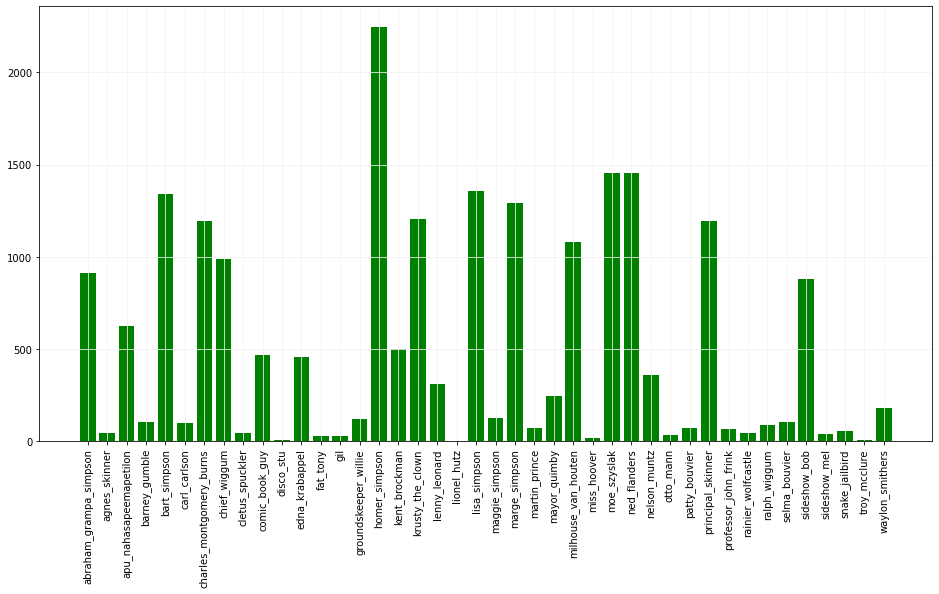

In [ ]:
# Словарь с уникальными ключами по именам персонажей
d_names = {}
max_elem_name = ''
max_elem_num = 0
for i in train_val_files:
    if i.parent.name in d_names:
        d_names[i.parent.name] += 1
    else:
        d_names[i.parent.name] = 1
    if d_names[i.parent.name]>max_elem_num:
        max_elem_name = i.parent.name
        max_elem_num = d_names[i.parent.name]

plt.figure(figsize=(16, 8))
plt.xticks(rotation=90)
plt.grid(color='0.95')
plt.bar(d_names.keys(), d_names.values(), color='g')

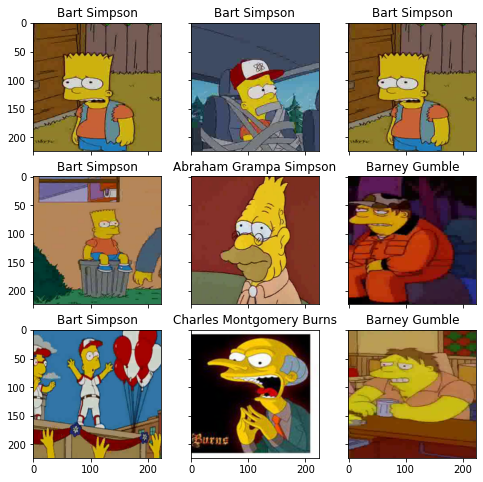

In [ ]:
fig, ax = plt.subplots(nrows=3, ncols=3,figsize=(8, 8), \
                        sharey=True, sharex=True)
for fig_x in ax.flatten():
    random_characters = int(np.random.uniform(0,1000))
    im_val, label = val_dataset[random_characters]
    img_label = " ".join(map(lambda x: x.capitalize(),\
                val_dataset.label_encoder.inverse_transform([label])[0].split('_')))
    imshow(im_val.data.cpu(), \
          title=img_label,plt_ax=fig_x)

<a id='AlexNet_simple_data'></a>

## Модель AlexNet с одним полносвязным слоем

[Перейти к "Оглавлению"](#Main)

<a id='AlexNet_simple_data_learn'></a>

### Обучение модели

[Перейти к "Оглавлению"](#Main)

In [ ]:
model_alex = models.alexnet(pretrained=True)
model_alex

Downloading: "https://download.pytorch.org/models/alexnet-owt-7be5be79.pth" to /root/.cache/torch/hub/checkpoints/alexnet-owt-7be5be79.pth


  0%|          | 0.00/233M [00:00<?, ?B/s]

AlexNet(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(11, 11), stride=(4, 4), padding=(2, 2))
    (1): ReLU(inplace=True)
    (2): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Conv2d(64, 192, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (4): ReLU(inplace=True)
    (5): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (6): Conv2d(192, 384, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (7): ReLU(inplace=True)
    (8): Conv2d(384, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (9): ReLU(inplace=True)
    (10): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (avgpool): AdaptiveAvgPool2d(output_size=(6, 6))
  (classifier): Sequential(
    (0): Dropout(p=0.5, inplace=False)
    (1): Linear(in_features=9216, out_features=4096, bias=True)
 

In [ ]:
layers_to_unfreeze = 6

# Выключаем подсчет градиентов для слоев, которые не будем обучать
for param in model_alex.features[:-layers_to_unfreeze].parameters():
    param.requires_grad = False

# num_features - это размерность вектора фич, поступающего на вход FC-слою
num_features = 9216

# Заменяем Fully-Connected слой на наш линейный классификатор
model_alex.classifier = nn.Sequential(OrderedDict([
    ('batch_norm', nn.BatchNorm1d(num_features)),
    ('drop', nn.Dropout(p=0.1)),
    ('linerar1', nn.Linear(num_features, len(np.unique(train_val_labels))))
]))


# Использовать ли GPU
use_gpu = torch.cuda.is_available()
if use_gpu:
    model_alex = model_alex.cuda()

# В качестве cost function используем кросс-энтропию
loss_fn = nn.CrossEntropyLoss()

# В качестве оптимизатора - стохастический градиентный спуск
optimizer_ft = torch.optim.Adam(params=[
        {"params": model_alex.classifier.parameters()},
        {"params": model_alex.features.parameters(), "lr": 5e-5},
    ], 
    lr=1e-4
)

# Умножает learning_rate на 0.1 каждые 4 эпох (это одна из эвристик, не было на лекциях)
exp_lr_scheduler = lr_scheduler.StepLR(optimizer_ft, step_size=4, gamma=0.1)

In [ ]:
model_alex

AlexNet(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(11, 11), stride=(4, 4), padding=(2, 2))
    (1): ReLU(inplace=True)
    (2): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Conv2d(64, 192, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (4): ReLU(inplace=True)
    (5): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (6): Conv2d(192, 384, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (7): ReLU(inplace=True)
    (8): Conv2d(384, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (9): ReLU(inplace=True)
    (10): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (avgpool): AdaptiveAvgPool2d(output_size=(6, 6))
  (classifier): Sequential(
    (batch_norm): BatchNorm1d(9216, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    

In [ ]:
model_alex, losses, f1_metric, accuracy_metric = train_model(model_alex, loss_fn, optimizer_ft, 
                                                             exp_lr_scheduler, num_epochs=5)


Epoch::   0%|          | 0/5 [00:00<?, ?it/s]

/usr/local/lib/python3.7/dist-packages/torch/optim/lr_scheduler.py:134: UserWarning: Detected call of `lr_scheduler.step()` before `optimizer.step()`. In PyTorch 1.1.0 and later, you should call them in the opposite order: `optimizer.step()` before `lr_scheduler.step()`.  Failure to do this will result in PyTorch skipping the first value of the learning rate schedule. See more details at https://pytorch.org/docs/stable/optim.html#how-to-adjust-learning-rate
  "https://pytorch.org/docs/stable/optim.html#how-to-adjust-learning-rate", UserWarning)


train iter::   0%|          | 0/491 [00:00<?, ?it/s]

val iter::   0%|          | 0/164 [00:00<?, ?it/s]

train iter::   0%|          | 0/491 [00:00<?, ?it/s]

val iter::   0%|          | 0/164 [00:00<?, ?it/s]

train iter::   0%|          | 0/491 [00:00<?, ?it/s]

val iter::   0%|          | 0/164 [00:00<?, ?it/s]

train iter::   0%|          | 0/491 [00:00<?, ?it/s]

val iter::   0%|          | 0/164 [00:00<?, ?it/s]

train iter::   0%|          | 0/491 [00:00<?, ?it/s]

val iter::   0%|          | 0/164 [00:00<?, ?it/s]

Training complete in 16m 56s
Best val Acc: 0.872373


<a id='AlexNet_simple_data_draw'></a>

### Отрисовка графиков для AlexNet

[Перейти к "Оглавлению"](#Main)

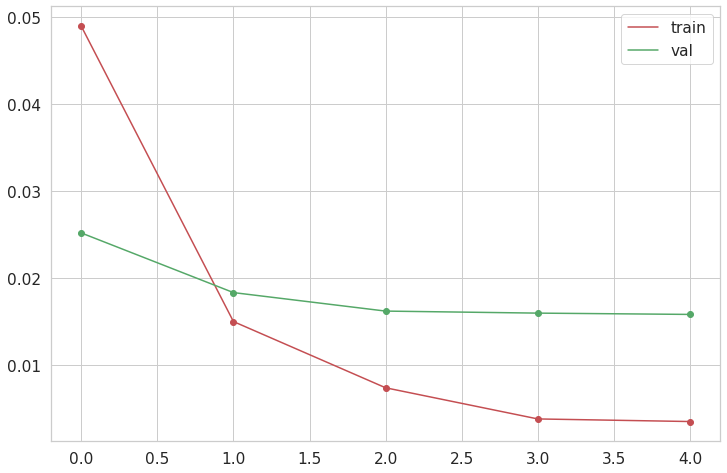

In [ ]:
import seaborn as sns

sns.set(style="whitegrid", font_scale=1.4)

# Построим график лосса при обучении и валидации

#Ваш код здесь
plt.figure(figsize=(12, 8))
plt.plot(losses['train'], 'r-', label="train")
plt.plot(losses['val'], 'g-', label="val")
plt.plot(losses['train'], 'ro')
plt.plot(losses['val'], 'go')
plt.legend()
plt.show()

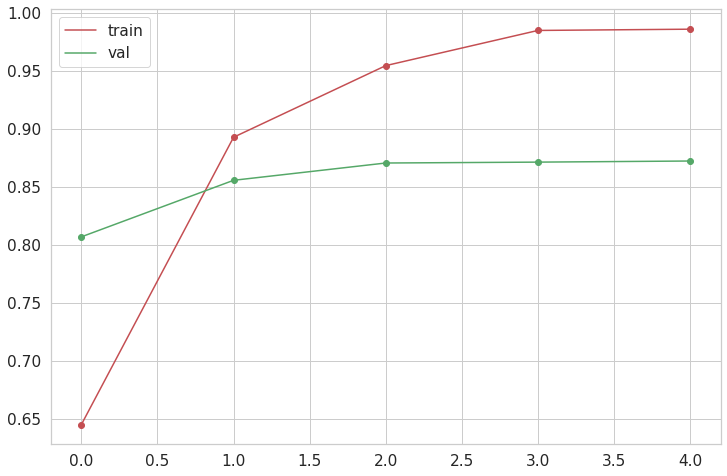

In [ ]:
import seaborn as sns

sns.set(style="whitegrid", font_scale=1.4)

# Построим график метрик качества при обучении и валидации

#Ваш код здесь
plt.figure(figsize=(12, 8))
plt.plot(accuracy_metric['train'], 'r-', label="train")
plt.plot(accuracy_metric['val'], 'g-', label="val")
plt.plot(accuracy_metric['train'], 'ro')
plt.plot(accuracy_metric['val'], 'go')
plt.legend()
plt.show()

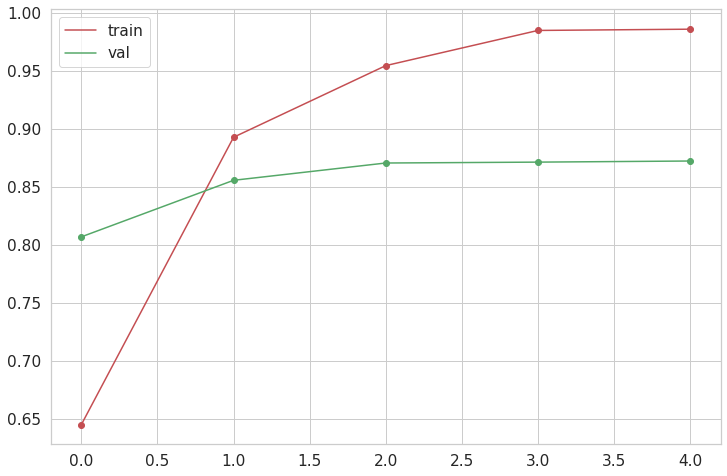

In [ ]:
import seaborn as sns

sns.set(style="whitegrid", font_scale=1.4)

# Построим график лосса при обучении и валидации

#Ваш код здесь
plt.figure(figsize=(12, 8))
plt.plot(f1_metric['train'], 'r-', label="train")
plt.plot(f1_metric['val'], 'g-', label="val")
plt.plot(f1_metric['train'], 'ro')
plt.plot(f1_metric['val'], 'go')
plt.legend()
plt.show()

<a id='AlexNet_simple_data_summary'></a>

### Выводы из графиков и результатов расчетов
 - на тренировочной выборке был получен высокий процент точности предсказаний - +98%
 - на валидационной выборке результат достиг только +87%

=> Модель переобучилась на тренировочных данных и не смогла себя проявить на валидационной выборке. Нужно заморозить большее число слоев, а не менять всю модель

f1_score показывает значения похожие с метрикой accuracy. Дальше можно оставить для расчетов только accuracy

[Перейти к "Оглавлению"](#Main)

<a id='VGG16_simple_data'></a>

## Модель VGG16

[Перейти к "Оглавлению"](#Main)

<a id='VGG16_simple_data_learn'></a>

### Обучение модели

[Перейти к "Оглавлению"](#Main)

In [ ]:
# Ваш код здесь
model_extractor = models.vgg16(pretrained=True)
model_extractor

Downloading: "https://download.pytorch.org/models/vgg16-397923af.pth" to /root/.cache/torch/hub/checkpoints/vgg16-397923af.pth


  0%|          | 0.00/528M [00:00<?, ?B/s]

VGG(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace=True)
    (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU(inplace=True)
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU(inplace=True)
    (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU(inplace=True)
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU(inplace=True)
    (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (15): ReLU(inplace=True)
    (16): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1

In [ ]:
layers_to_unfreeze = 10

# Выключаем подсчет градиентов для слоев, которые не будем обучать
for param in model_alex.features[:-layers_to_unfreeze].parameters():
    param.requires_grad = False

# num_features -- это размерность вектора фич, поступающего на вход FC-слою
num_features = 25088

# Заменяем Fully-Connected слой на наш линейный классификатор
model_extractor.classifier = nn.Sequential(OrderedDict([
    ('batch_norm', nn.BatchNorm1d(num_features)),
    ('drop', nn.Dropout(p=0.7)),
    ('linerar1', nn.Linear(num_features, len(np.unique(train_val_labels))))
]))

use_gpu = torch.cuda.is_available()
# Использовать ли GPU
if use_gpu:
    model_extractor = model_extractor.cuda()

# В качестве cost function используем кросс-энтропию
loss_fn = nn.CrossEntropyLoss()

# Обучаем только классификатор
optimizer = torch.optim.Adam(params=[
        {"params": model_extractor.classifier.parameters()},
        {"params": model_extractor.features.parameters(), "lr": 3e-5,}
    ], 
    lr=1e-4
)

# Умножает learning_rate на 0.1 каждые 7 эпох (это одна из эвристик, не было на лекциях)
exp_lr_scheduler = lr_scheduler.StepLR(optimizer, step_size=4, gamma=0.1)

In [ ]:
model_extractor

VGG(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace=True)
    (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU(inplace=True)
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU(inplace=True)
    (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU(inplace=True)
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU(inplace=True)
    (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (15): ReLU(inplace=True)
    (16): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1

In [ ]:
model_extractor, losses, f1_metric, accuracy_metric  = train_model(model_extractor, loss_fn, 
                                                                   optimizer, exp_lr_scheduler, 
                                                                   num_epochs=5)

Epoch::   0%|          | 0/5 [00:00<?, ?it/s]

/usr/local/lib/python3.7/dist-packages/torch/optim/lr_scheduler.py:134: UserWarning: Detected call of `lr_scheduler.step()` before `optimizer.step()`. In PyTorch 1.1.0 and later, you should call them in the opposite order: `optimizer.step()` before `lr_scheduler.step()`.  Failure to do this will result in PyTorch skipping the first value of the learning rate schedule. See more details at https://pytorch.org/docs/stable/optim.html#how-to-adjust-learning-rate
  "https://pytorch.org/docs/stable/optim.html#how-to-adjust-learning-rate", UserWarning)


train iter::   0%|          | 0/491 [00:00<?, ?it/s]

val iter::   0%|          | 0/164 [00:00<?, ?it/s]

train iter::   0%|          | 0/491 [00:00<?, ?it/s]

val iter::   0%|          | 0/164 [00:00<?, ?it/s]

train iter::   0%|          | 0/491 [00:00<?, ?it/s]

val iter::   0%|          | 0/164 [00:00<?, ?it/s]

train iter::   0%|          | 0/491 [00:00<?, ?it/s]

val iter::   0%|          | 0/164 [00:00<?, ?it/s]

train iter::   0%|          | 0/491 [00:00<?, ?it/s]

val iter::   0%|          | 0/164 [00:00<?, ?it/s]

Training complete in 59m 28s
Best val Acc: 0.861292


<a id='VGG16_simple_data_draw'></a>

### Строим графики для VGG16

[Перейти к "Оглавлению"](#Main)

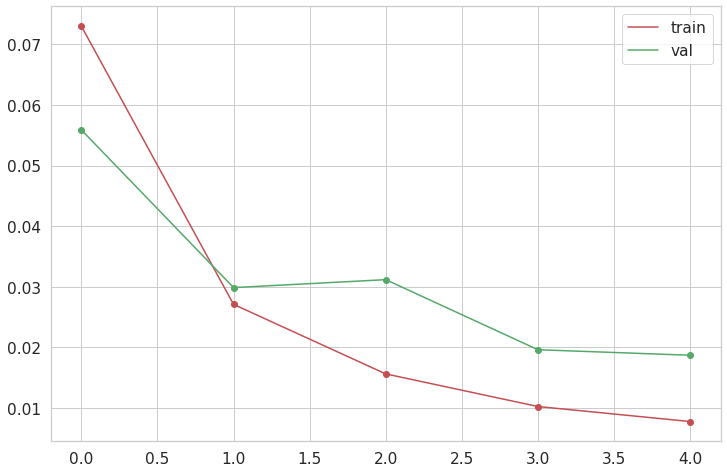

In [ ]:
import seaborn as sns

sns.set(style="whitegrid", font_scale=1.4)

# Построим график лосса при обучении и валидации

#Ваш код здесь
plt.figure(figsize=(12, 8))
plt.plot(losses['train'], 'r-', label="train")
plt.plot(losses['val'], 'g-', label="val")
plt.plot(losses['train'], 'ro')
plt.plot(losses['val'], 'go')
plt.legend()
plt.show()

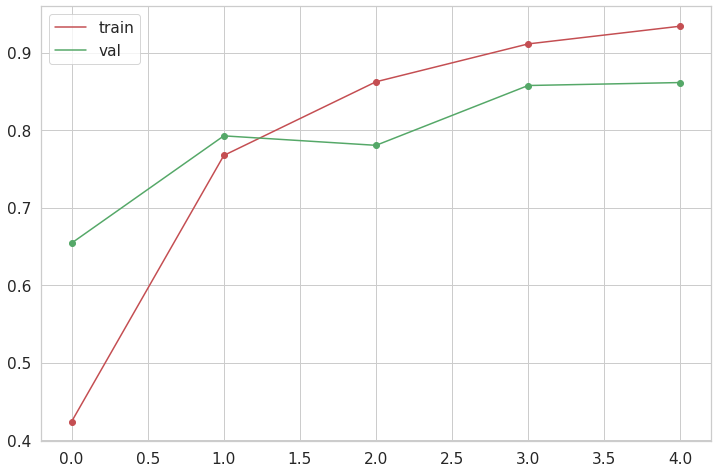

In [ ]:
import seaborn as sns

sns.set(style="whitegrid", font_scale=1.4)

# Построим график метрик качества при обучении и валидации

#Ваш код здесь
plt.figure(figsize=(12, 8))
plt.plot(accuracy_metric['train'], 'r-', label="train")
plt.plot(accuracy_metric['val'], 'g-', label="val")
plt.plot(accuracy_metric['train'], 'ro')
plt.plot(accuracy_metric['val'], 'go')
plt.legend()
plt.show()

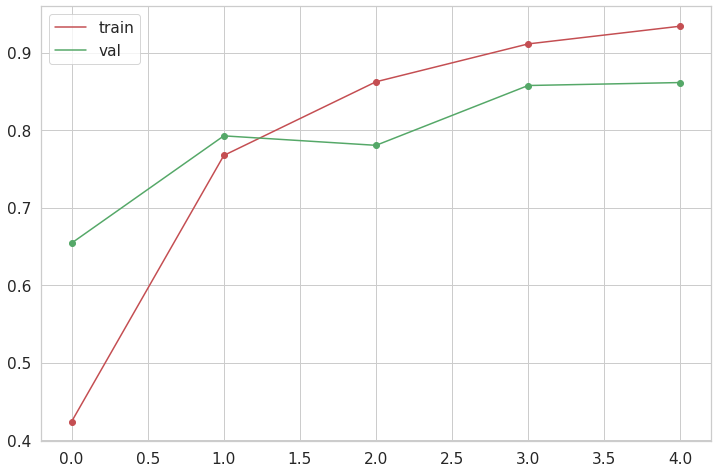

In [ ]:
import seaborn as sns

sns.set(style="whitegrid", font_scale=1.4)

# Построим график лосса при обучении и валидации

#Ваш код здесь
plt.figure(figsize=(12, 8))
plt.plot(f1_metric['train'], 'r-', label="train")
plt.plot(f1_metric['val'], 'g-', label="val")
plt.plot(f1_metric['train'], 'ro')
plt.plot(f1_metric['val'], 'go')
plt.legend()
plt.show()

<a id='VGG16_simple_data_summary'></a>

### Выводы из графиков и результатов расчетов
 - на тренировочной выборке был получен хороший процент точности предсказаний - 93%
 - на валидационной выборке результат достиг только 86%

=> Модель переобучилась на тренировочных данных и не смогла себя проявить на валидационной выборке. Слои были замарожены

Модель обучается достаточно долго, поэтому дальше не используется. Да и не нужна настолько сложная модель для такого количества данных

[Перейти к "Оглавлению"](#Main)

<a id='AlexNet_tuning_simple_data'></a>

## Модель AlexNet с двумя полносвязными слоями

[Перейти к "Оглавлению"](#Main)

<a id='AlexNet_tuning_simple_data_learn'></a>

### Обучение модели

[Перейти к "Оглавлению"](#Main)

In [ ]:
model = models.alexnet(pretrained=True)
model

AlexNet(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(11, 11), stride=(4, 4), padding=(2, 2))
    (1): ReLU(inplace=True)
    (2): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Conv2d(64, 192, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (4): ReLU(inplace=True)
    (5): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (6): Conv2d(192, 384, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (7): ReLU(inplace=True)
    (8): Conv2d(384, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (9): ReLU(inplace=True)
    (10): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (avgpool): AdaptiveAvgPool2d(output_size=(6, 6))
  (classifier): Sequential(
    (0): Dropout(p=0.5, inplace=False)
    (1): Linear(in_features=9216, out_features=4096, bias=True)
 

In [ ]:
layers_to_unfreeze = 9

# Выключаем подсчет градиентов для слоев, которые не будем обучать
for param in model.features[:-layers_to_unfreeze].parameters():
    param.requires_grad = False


# num_features -- это размерность вектора фич, поступающего на вход FC-слою
num_features = 9216

# Заменяем Fully-Connected слой на наш линейный классификатор
model.classifier = nn.Sequential(OrderedDict([
    ('batch_norm', nn.BatchNorm1d(num_features)),
    ('drop1', nn.Dropout(p=0.7)),
    ('linerar1', nn.Linear(in_features=num_features, out_features=1000)),
    ('relu', nn.ReLU()),
    ('drop2', nn.Dropout(p=0.7)),
    ('linerar2', nn.Linear(in_features=1000, out_features=len(np.unique(train_val_labels))))
]))

# Использовать ли GPU
use_gpu = torch.cuda.is_available()
if use_gpu:
    model = model.cuda()

# В качестве cost function используем кросс-энтропию
loss_fn = nn.CrossEntropyLoss()

# В качестве оптимизатора - стохастический градиентный спуск
optimizer_ft = torch.optim.Adam(params=[
        {"params": model.classifier.parameters()},
        {"params": model.features.parameters(), "lr": 5e-5,}
    ], 
    lr=1e-4
)


# Умножает learning_rate на 0.1 каждые 4 эпох (это одна из эвристик, не было на лекциях)
exp_lr_scheduler = lr_scheduler.StepLR(optimizer_ft, step_size=4, gamma=0.1)

In [ ]:
model

AlexNet(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(11, 11), stride=(4, 4), padding=(2, 2))
    (1): ReLU(inplace=True)
    (2): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Conv2d(64, 192, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (4): ReLU(inplace=True)
    (5): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (6): Conv2d(192, 384, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (7): ReLU(inplace=True)
    (8): Conv2d(384, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (9): ReLU(inplace=True)
    (10): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (avgpool): AdaptiveAvgPool2d(output_size=(6, 6))
  (classifier): Sequential(
    (batch_norm): BatchNorm1d(9216, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    

In [ ]:
model, losses, f1_metric, accuracy_metric = train_model(model, loss_fn, optimizer_ft, exp_lr_scheduler, 
                                                        num_epochs=5)

Epoch::   0%|          | 0/5 [00:00<?, ?it/s]

/usr/local/lib/python3.7/dist-packages/torch/optim/lr_scheduler.py:134: UserWarning: Detected call of `lr_scheduler.step()` before `optimizer.step()`. In PyTorch 1.1.0 and later, you should call them in the opposite order: `optimizer.step()` before `lr_scheduler.step()`.  Failure to do this will result in PyTorch skipping the first value of the learning rate schedule. See more details at https://pytorch.org/docs/stable/optim.html#how-to-adjust-learning-rate
  "https://pytorch.org/docs/stable/optim.html#how-to-adjust-learning-rate", UserWarning)


train iter::   0%|          | 0/491 [00:00<?, ?it/s]

val iter::   0%|          | 0/164 [00:00<?, ?it/s]

train iter::   0%|          | 0/491 [00:00<?, ?it/s]

val iter::   0%|          | 0/164 [00:00<?, ?it/s]

train iter::   0%|          | 0/491 [00:00<?, ?it/s]

val iter::   0%|          | 0/164 [00:00<?, ?it/s]

train iter::   0%|          | 0/491 [00:00<?, ?it/s]

val iter::   0%|          | 0/164 [00:00<?, ?it/s]

train iter::   0%|          | 0/491 [00:00<?, ?it/s]

val iter::   0%|          | 0/164 [00:00<?, ?it/s]

Training complete in 18m 4s
Best val Acc: 0.876958


<a id='AlexNet_tuning_simple_data_draw'></a>

### Строим графики для AlexNet с тюнингом параметров

[Перейти к "Оглавлению"](#Main)

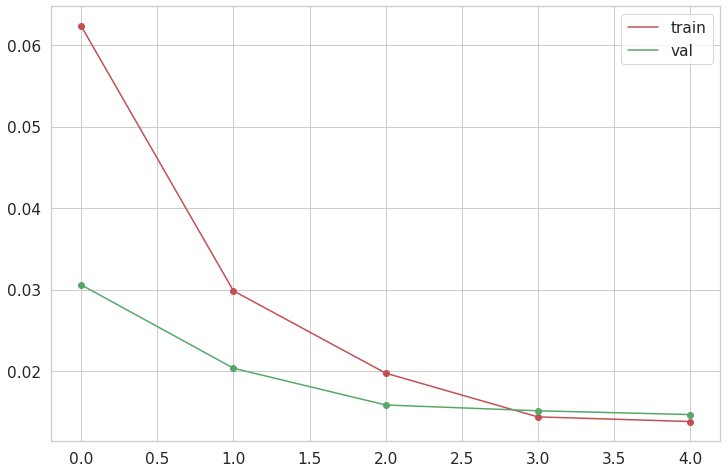

In [ ]:
import seaborn as sns

sns.set(style="whitegrid", font_scale=1.4)

# Построим график лосса при обучении и валидации

#Ваш код здесь
plt.figure(figsize=(12, 8))
plt.plot(losses['train'], 'r-', label="train")
plt.plot(losses['val'], 'g-', label="val")
plt.plot(losses['train'], 'ro')
plt.plot(losses['val'], 'go')
plt.legend()
plt.show()

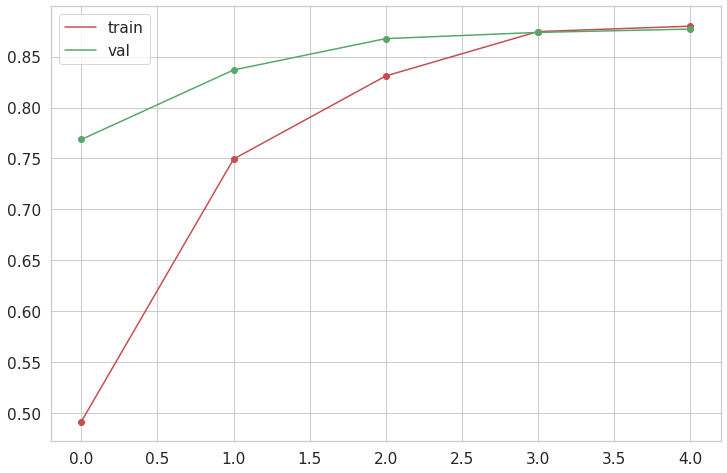

In [ ]:
import seaborn as sns

sns.set(style="whitegrid", font_scale=1.4)

# Построим график метрик качества при обучении и валидации

#Ваш код здесь
plt.figure(figsize=(12, 8))
plt.plot(accuracy_metric['train'], 'r-', label="train")
plt.plot(accuracy_metric['val'], 'g-', label="val")
plt.plot(accuracy_metric['train'], 'ro')
plt.plot(accuracy_metric['val'], 'go')
plt.legend()
plt.show()

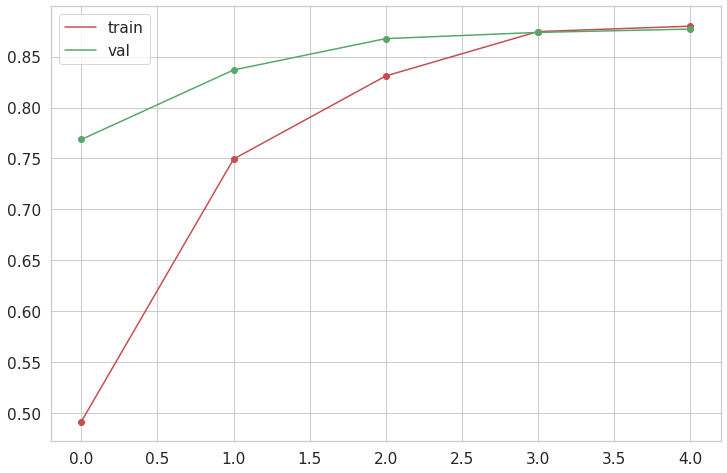

In [ ]:
import seaborn as sns

sns.set(style="whitegrid", font_scale=1.4)

# Построим график лосса при обучении и валидации

#Ваш код здесь
plt.figure(figsize=(12, 8))
plt.plot(f1_metric['train'], 'r-', label="train")
plt.plot(f1_metric['val'], 'g-', label="val")
plt.plot(f1_metric['train'], 'ro')
plt.plot(f1_metric['val'], 'go')
plt.legend()
plt.show()

<a id='AlexNet_tuning_simple_data_summary'></a>

### Выводы из графиков и результатов расчетов
Качество на валидационной выборке +87%

Что еще можно сделать
- добавить больше представителей малочисленных классов
- добавить еще один слой
- рассмотреть разные вероятности для Dropout
- рассмотреть разный lr

[Перейти к "Оглавлению"](#Main)

<a id='Prepare_data_best_Oversampling'></a>

# Преобразование картинок в классах. Пересэмплирование

Использована модель AlexNet на данных, на которых был применено пересэмплирование (Oversampling the minority class). Объекты с малым количеством представителей обрабатывались с помощью torchvision.transforms так, чтобы представителей стало сравнимо с представителями максимального класса 

[Перейти к "Оглавлению"](#Main)

<a id='Prepare_data_best_Oversampling_prepare'></a>

## Делаем всю необходимую работу

[Перейти к "Оглавлению"](#Main)

Размеры классов отличаются довольно сильно

Всего в тренировочной выборке 20933

Разброс между количеством изображений очень велик - от 2246 до 3 => Нужно выровнять классы для более точного предсказания для модели / Добавить больше картинок для малочисленных классов, желательно до уровня максимального класса


In [ ]:
def train_model(model, criterion, optimizer, scheduler, num_epochs=5):
    since = time.time()

    best_model_wts = model.state_dict()
    best_acc = 0.0
    
    #Ваш код здесь
    losses = {'train': [], "val": []}
    f1_metric = {'train': [], "val": []}
    accuracy_metric = {'train': [], "val": []}

    pbar = trange(num_epochs, desc="Epoch:")

    for epoch in pbar:

        # каждя эпоха имеет обучающую и тестовую стадии
        for phase in ['train', 'val']:
            if phase == 'train':
                scheduler.step()
                model.train(True)  # установаить модель в режим обучения
            else:
                model.eval()

            running_loss = 0.0
            running_corrects = 0

            # итерируемся по батчам
            for data in tqdm(dataloaders[phase], leave=False, desc=f"{phase} iter:"):
                # получаем картинки и метки
                inputs, labels = data

                # оборачиваем в переменные
                if use_gpu:
                    inputs = inputs.cuda()
                    labels = labels.cuda()
                else:
                    inputs, labels = inputs, labels

                # инициализируем градиенты параметров
                if phase=="train":
                    optimizer.zero_grad()

                # forward pass
                if phase == "eval":
                    with torch.no_grad():
                        outputs = model(inputs)
                else:
                    outputs = model(inputs)
                preds = torch.argmax(outputs, -1)
                loss = criterion(outputs, labels)
                
                # backward pass + оптимизируем только если это стадия обучения
                if phase == 'train':
                    loss.backward()
                    optimizer.step()

                # статистика
                running_loss += loss.item()
                running_corrects += int(torch.sum(preds == labels.data))

            epoch_loss = running_loss / dataset_sizes[phase]
            epoch_acc = running_corrects / dataset_sizes[phase]
           
            # Ваш код здесь
            losses[phase].append(epoch_loss)
            accuracy_metric[phase].append(epoch_acc)

            pbar.set_description('{} Loss: {:.4f} Acc: {:.4f}'.format(
                                    phase, epoch_loss, epoch_acc))

            # если достиглось лучшее качество, то запомним веса модели
            if phase == 'val' and epoch_acc > best_acc:
                best_acc = epoch_acc
                best_model_wts = model.state_dict()

    time_elapsed = time.time() - since
    print('Training complete in {:.0f}m {:.0f}s'.format(
        time_elapsed // 60, time_elapsed % 60))
    print('Best val Acc: {:4f}'.format(best_acc))

    # загрузим лучшие веса модели
    model.load_state_dict(best_model_wts)
    return model, losses, accuracy_metric

<a id='Prepare_data_best_Oversampling_dict'></a>

### Получаем словарь всех классов

[Перейти к "Оглавлению"](#Main)

<BarContainer object of 42 artists>

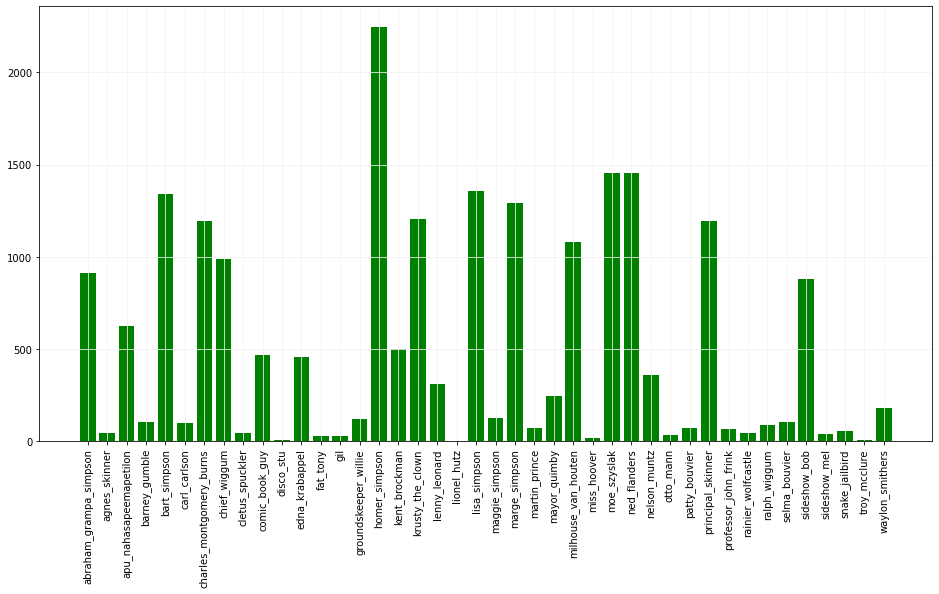

In [ ]:
TRAIN_DIR = Path('/content/train')
TEST_DIR = Path('/content/test')

# Добавляет в переменную файлы из директории
train_val_files = sorted(list(TRAIN_DIR.rglob('*.jpg')))
test_files = sorted(list(TEST_DIR.rglob('*.jpg')))

# Словарь с уникальными ключами по именам персонажей
d_names = {}
max_elem_name = ''
max_elem_num = 0
for i in train_val_files:
    if i.parent.name in d_names:
        d_names[i.parent.name] += 1
    else:
        d_names[i.parent.name] = 1
    if d_names[i.parent.name]>max_elem_num:
        max_elem_name = i.parent.name
        max_elem_num = d_names[i.parent.name]

# Отрисовка классов
plt.figure(figsize=(16, 8))
plt.xticks(rotation=90)
plt.grid(color='0.95')
plt.bar(d_names.keys(), d_names.values(), color='g')

<a id='Prepare_data_best_Oversampling_transforms'></a>

### Использование torchvision.transforms

[Перейти к "Оглавлению"](#Main)

In [ ]:
import torchvision.transforms as T


def save_hflipper(path_in, image):
    """
    Добавление нового изображения с преобразованием RandomHorizontalFlip
    """
    transformed_imgs = T.RandomHorizontalFlip(p=1)(image)
    s = str(path_in).split('/')
    s[-1] = s[-1].replace('.', '_rhf.')
    new_path = '/'.join(s)
    transformed_imgs.save(new_path)


def save_vflipper(path_in, image):
    """
    Добавление нового изображения с преобразованием RandomVerticalFlip
    """
    transformed_imgs = T.RandomVerticalFlip(p=1)(image)
    s = str(path_in).split('/')
    s[-1] = s[-1].replace('.', '_rvf.')
    new_path = '/'.join(s)
    transformed_imgs.save(new_path)


def save_jitter(path_in, image):
    """
    Добавление нового изображения с преобразованием ColorJitter
    """
    transformed_imgs = T.ColorJitter(brightness=.5, hue=.3)(image)
    s = str(path_in).split('/')
    s[-1] = s[-1].replace('.', '_cj.')
    new_path = '/'.join(s)
    transformed_imgs.save(new_path)


def save_solorizer(path_in, image):
    """
    Добавление нового изображения с преобразованием RandomSolarize
    """
    transformed_imgs = T.RandomSolarize(threshold=113.0, p=1)(image)
    s = str(path_in).split('/')
    s[-1] = s[-1].replace('.', '_rs.')
    new_path = '/'.join(s)
    transformed_imgs.save(new_path)


def save_equalizer(path_in, image):
    """
    Добавление нового изображения с преобразованием RandomEqualize
    """
    transformed_imgs = T.RandomEqualize(p=1)(image)
    s = str(path_in).split('/')
    s[-1] = s[-1].replace('.', '_re.')
    new_path = '/'.join(s)
    transformed_imgs.save(new_path)


def save_rotation(path_in, image):
    """
    Добавление 3 новых изображений с преобразованием RandomRotation
    """
    transformed_imgs = T.RandomRotation(degrees=(0, 180))
    rotated_imgs = [transformed_imgs(image) for _ in range(3)]

    for i in range(len(rotated_imgs)):
        s = str(path_in).split('/')
        s[-1] = s[-1].replace('.', f'_rr{i}.')
        new_path = '/'.join(s)
        rotated_imgs[i].save(new_path)


def save_perspective(path_in, image):
    """
    Добавление 3 новых изображений с преобразованием RandomPerspective
    """
    transformed_imgs = T.RandomPerspective(distortion_scale=0.6, p=1.0)
    perspective_imgs = [transformed_imgs(image) for _ in range(3)]

    for i in range(len(perspective_imgs)):
        s = str(path_in).split('/')
        s[-1] = s[-1].replace('.', f'_rr{i}.')
        new_path = '/'.join(s)
        perspective_imgs[i].save(new_path)


print("Добавление в выборку обновленных фото")
for i in tqdm(train_val_files):
    orig_img = Image.open(i)

    if 800 <= d_names[i.parent.name] <= 2000:
        save_hflipper(path_in=i, image=orig_img)

    elif 450 <= d_names[i.parent.name] < 800:
        save_hflipper(path_in=i, image=orig_img)
        save_vflipper(path_in=i, image=orig_img)

    elif 88 <= d_names[i.parent.name] < 450:
        save_hflipper(path_in=i, image=orig_img)
        save_vflipper(path_in=i, image=orig_img)
        save_jitter(path_in=i, image=orig_img)

    elif 40 <= d_names[i.parent.name] < 88:
        save_hflipper(path_in=i, image=orig_img)
        save_vflipper(path_in=i, image=orig_img)
        save_jitter(path_in=i, image=orig_img)
        save_solorizer(path_in=i, image=orig_img)

    elif 20 <= d_names[i.parent.name] < 40:
        save_hflipper(path_in=i, image=orig_img)
        save_vflipper(path_in=i, image=orig_img)
        save_jitter(path_in=i, image=orig_img)
        save_solorizer(path_in=i, image=orig_img)
        save_equalizer(path_in=i, image=orig_img)

    elif d_names[i.parent.name] < 20:
        save_hflipper(path_in=i, image=orig_img)
        save_vflipper(path_in=i, image=orig_img)
        save_jitter(path_in=i, image=orig_img)
        save_solorizer(path_in=i, image=orig_img)
        save_equalizer(path_in=i, image=orig_img)
        save_equalizer(path_in=i, image=orig_img)
        save_perspective(path_in=i, image=orig_img)

print("Окончание добавление в выборку обновленных фото")

Добавление в выборку обновленных фото


  0%|          | 0/20933 [00:00<?, ?it/s]

Окончание добавление в выборку обновленных фото


<a id='Update_parameters_Oversampling_update'></a>

### Обновление переменных

[Перейти к "Оглавлению"](#Main)

47054


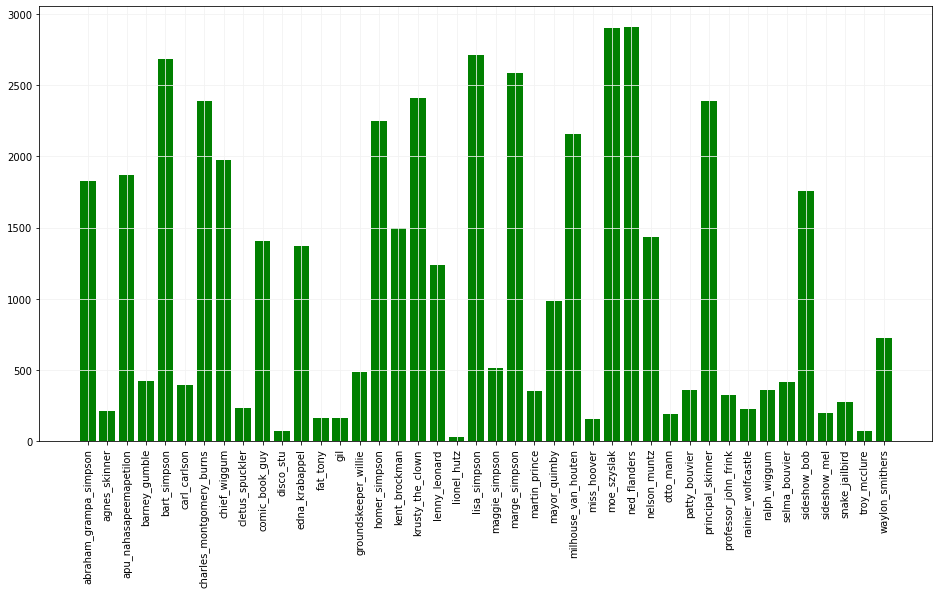

In [ ]:
from sklearn.model_selection import train_test_split


TRAIN_DIR = Path('/content/train')
TEST_DIR = Path('/content/test')

# Добавляет в переменную файлы из директории
train_val_files = sorted(list(TRAIN_DIR.rglob('*.jpg')))
test_files = sorted(list(TEST_DIR.rglob('*.jpg')))
print(len(train_val_files))

# Словарь с уникальными ключами по именам персонажей
d_names = {}
max_elem_name = ''
max_elem_num = 0
for i in train_val_files:
    if i.parent.name in d_names:
        d_names[i.parent.name] += 1
    else:
        d_names[i.parent.name] = 1
    if d_names[i.parent.name]>max_elem_num:
        max_elem_name = i.parent.name
        max_elem_num = d_names[i.parent.name]

# Отрисовка классов
plt.figure(figsize=(16, 8))
plt.xticks(rotation=90)
plt.grid(color='0.95')
plt.bar(d_names.keys(), d_names.values(), color='g')

train_val_labels = [path.parent.name for path in train_val_files]
train_files, val_files = train_test_split(train_val_files, test_size=0.25, \
                                          stratify=train_val_labels, random_state=257)

In [ ]:
from sklearn.preprocessing import LabelEncoder


val_dataset = SimpsonsDataset(val_files, mode='val')
train_dataset = SimpsonsDataset(train_files, mode='train')

dataloaders = {
    'train': torch.utils.data.DataLoader(train_dataset, batch_size=32, shuffle=True, num_workers=0),
    'val': torch.utils.data.DataLoader(val_dataset, batch_size=32, shuffle=False, num_workers=0)       
}

dataset_sizes = {
    'train': len(train_dataset),
    'val': len(val_dataset)
}

print(dataset_sizes)
print(len(dataloaders['train']))
print(len(dataloaders['val']))

{'train': 35290, 'val': 11764}
1103
368


<a id='Update_parameters_Oversampling_Alex_Adam'></a>

## Модель AlexNet с одним полносвязным слоем и оптимизатором Adam

[Перейти к "Оглавлению"](#Main)

<a id='Update_parameters_Oversampling_Alex_Adam_learn'></a>

### Обучение модели

[Перейти к "Оглавлению"](#Main)

In [ ]:
model_alex = models.alexnet(pretrained=True)
model_alex

AlexNet(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(11, 11), stride=(4, 4), padding=(2, 2))
    (1): ReLU(inplace=True)
    (2): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Conv2d(64, 192, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (4): ReLU(inplace=True)
    (5): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (6): Conv2d(192, 384, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (7): ReLU(inplace=True)
    (8): Conv2d(384, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (9): ReLU(inplace=True)
    (10): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (avgpool): AdaptiveAvgPool2d(output_size=(6, 6))
  (classifier): Sequential(
    (0): Dropout(p=0.5, inplace=False)
    (1): Linear(in_features=9216, out_features=4096, bias=True)
 

In [ ]:
# 0.9244 - on validation data - best - layers=6 - p=0.3
# 0.9386 - on validation data - best - layers=9 - p=0.3
# 0.9444 - on validation data - best - layers=12 - p=0.3
# 0.9391 - on validation data - best - layers=12 - p=0.5 - d=5%

layers_to_unfreeze = 9

# Выключаем подсчет градиентов для слоев, которые не будем обучать
for param in model_alex.features[:-layers_to_unfreeze].parameters():
    param.requires_grad = False

# num_features - это размерность вектора фич, поступающего на вход FC-слою
num_features = 9216

# Заменяем Fully-Connected слой на наш линейный классификатор
model_alex.classifier = nn.Sequential(OrderedDict([
    ('batch_norm', nn.BatchNorm1d(num_features)),
    ('drop', nn.Dropout(p=0.3)),
    ('linerar1', nn.Linear(num_features, len(np.unique(train_val_labels))))
]))

# Использовать ли GPU
use_gpu = torch.cuda.is_available()
if use_gpu:
    model_alex = model_alex.cuda()

# В качестве cost function используем кросс-энтропию
loss_fn = nn.CrossEntropyLoss()

# В качестве оптимизатора - стохастический градиентный спуск
optimizer_ft = optim.Adam(model_alex.parameters(), lr=1e-4)

# Умножает learning_rate на 0.1 каждые 5 эпох (это одна из эвристик, не было на лекциях)
exp_lr_scheduler = lr_scheduler.StepLR(optimizer_ft, step_size=4, gamma=0.1)

In [ ]:
model_alex

AlexNet(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(11, 11), stride=(4, 4), padding=(2, 2))
    (1): ReLU(inplace=True)
    (2): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Conv2d(64, 192, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (4): ReLU(inplace=True)
    (5): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (6): Conv2d(192, 384, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (7): ReLU(inplace=True)
    (8): Conv2d(384, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (9): ReLU(inplace=True)
    (10): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (avgpool): AdaptiveAvgPool2d(output_size=(6, 6))
  (classifier): Sequential(
    (batch_norm): BatchNorm1d(9216, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    

In [ ]:
model_alex, losses, accuracy_metric = train_model(model_alex, loss_fn, optimizer_ft, 
                                                  exp_lr_scheduler, num_epochs=5)

Epoch::   0%|          | 0/5 [00:00<?, ?it/s]

/usr/local/lib/python3.7/dist-packages/torch/optim/lr_scheduler.py:134: UserWarning: Detected call of `lr_scheduler.step()` before `optimizer.step()`. In PyTorch 1.1.0 and later, you should call them in the opposite order: `optimizer.step()` before `lr_scheduler.step()`.  Failure to do this will result in PyTorch skipping the first value of the learning rate schedule. See more details at https://pytorch.org/docs/stable/optim.html#how-to-adjust-learning-rate
  "https://pytorch.org/docs/stable/optim.html#how-to-adjust-learning-rate", UserWarning)


train iter::   0%|          | 0/1103 [00:00<?, ?it/s]

val iter::   0%|          | 0/368 [00:00<?, ?it/s]

train iter::   0%|          | 0/1103 [00:00<?, ?it/s]

val iter::   0%|          | 0/368 [00:00<?, ?it/s]

train iter::   0%|          | 0/1103 [00:00<?, ?it/s]

val iter::   0%|          | 0/368 [00:00<?, ?it/s]

train iter::   0%|          | 0/1103 [00:00<?, ?it/s]

val iter::   0%|          | 0/368 [00:00<?, ?it/s]

train iter::   0%|          | 0/1103 [00:00<?, ?it/s]

val iter::   0%|          | 0/368 [00:00<?, ?it/s]

Training complete in 35m 17s
Best val Acc: 0.938626


<a id='Update_parameters_Oversampling_Alex_Adam_draw'></a>

### Смотрим на графики для модели

[Перейти к "Оглавлению"](#Main)

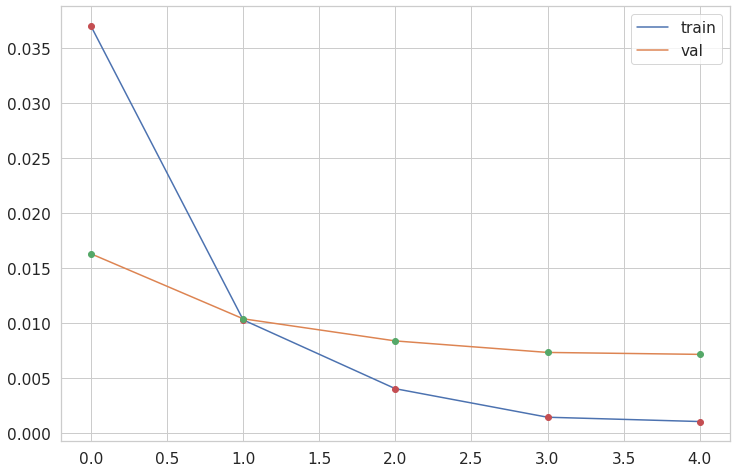

In [ ]:
import seaborn as sns

sns.set(style="whitegrid", font_scale=1.4)

# Построим график лосса при обучении и валидации

#Ваш код здесь
plt.figure(figsize=(12, 8))
plt.plot(losses['train'], label="train")
plt.plot(losses['val'], label="val")
plt.plot(losses['train'], 'ro')
plt.plot(losses['val'], 'go')
plt.legend()
plt.show()

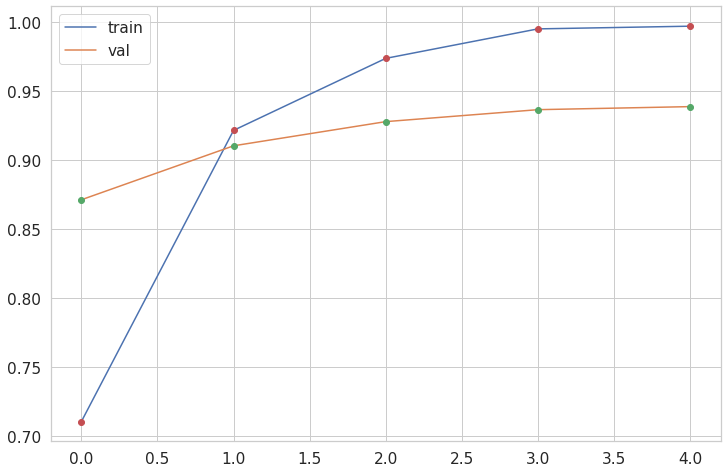

In [ ]:
import seaborn as sns

sns.set(style="whitegrid", font_scale=1.4)

# Построим график метрик качества при обучении и валидации

#Ваш код здесь
plt.figure(figsize=(12, 8))
plt.plot(accuracy_metric['train'], label="train")
plt.plot(accuracy_metric['val'], label="val")
plt.plot(accuracy_metric['train'], 'ro')
plt.plot(accuracy_metric['val'], 'go')
plt.legend()
plt.show()

<a id='Update_parameters_Oversampling_Alex_Adam_summary'></a>

### Выводы из графиков и результатов расчетов

Качество на валидационной выборке довольно хорошее.
Впринципе можно использовать для предсказаний

[Перейти к "Оглавлению"](#Main)


<a id='Update_parameters_Oversampling_Alex_AdamW'></a>

## Модель AlexNet с одним полносвязным слоем и оптимизатором AdamW

[Перейти к "Оглавлению"](#Main)

<a id='Update_parameters_Oversampling_Alex_AdamW_learn'></a>

### Обучение модели

[Перейти к "Оглавлению"](#Main)

In [ ]:
model_alex = models.alexnet(pretrained=True)
model_alex

AlexNet(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(11, 11), stride=(4, 4), padding=(2, 2))
    (1): ReLU(inplace=True)
    (2): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Conv2d(64, 192, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (4): ReLU(inplace=True)
    (5): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (6): Conv2d(192, 384, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (7): ReLU(inplace=True)
    (8): Conv2d(384, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (9): ReLU(inplace=True)
    (10): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (avgpool): AdaptiveAvgPool2d(output_size=(6, 6))
  (classifier): Sequential(
    (0): Dropout(p=0.5, inplace=False)
    (1): Linear(in_features=9216, out_features=4096, bias=True)
 

In [ ]:
# 0.9416 - on validation data - best
layers_to_unfreeze = 9

# Выключаем подсчет градиентов для слоев, которые не будем обучать
for param in model_alex.features[:-layers_to_unfreeze].parameters():
    param.requires_grad = False

# num_features - это размерность вектора фич, поступающего на вход FC-слою
num_features = 9216

# Заменяем Fully-Connected слой на наш линейный классификатор
model_alex.classifier = nn.Sequential(OrderedDict([
    ('batch_norm', nn.BatchNorm1d(num_features)),
    ('drop', nn.Dropout(p=0.3)),
    ('linerar1', nn.Linear(num_features, len(np.unique(train_val_labels))))
]))

# Использовать ли GPU
use_gpu = torch.cuda.is_available()
if use_gpu:
    model_alex = model_alex.cuda()

# В качестве cost function используем кросс-энтропию
loss_fn = nn.CrossEntropyLoss()

# В качестве оптимизатора - стохастический градиентный спуск
optimizer_ft = optim.AdamW(model_alex.parameters(), lr=1e-4)

# Умножает learning_rate на 0.1 каждые 5 эпох (это одна из эвристик, не было на лекциях)
exp_lr_scheduler = lr_scheduler.StepLR(optimizer_ft, step_size=4, gamma=0.1)

In [ ]:
model_alex

AlexNet(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(11, 11), stride=(4, 4), padding=(2, 2))
    (1): ReLU(inplace=True)
    (2): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Conv2d(64, 192, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (4): ReLU(inplace=True)
    (5): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (6): Conv2d(192, 384, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (7): ReLU(inplace=True)
    (8): Conv2d(384, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (9): ReLU(inplace=True)
    (10): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (avgpool): AdaptiveAvgPool2d(output_size=(6, 6))
  (classifier): Sequential(
    (batch_norm): BatchNorm1d(9216, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    

In [ ]:
model_alex, losses, accuracy_metric = train_model(model_alex, loss_fn, optimizer_ft, 
                                                  exp_lr_scheduler, num_epochs=5)

Epoch::   0%|          | 0/5 [00:00<?, ?it/s]

/usr/local/lib/python3.7/dist-packages/torch/optim/lr_scheduler.py:134: UserWarning: Detected call of `lr_scheduler.step()` before `optimizer.step()`. In PyTorch 1.1.0 and later, you should call them in the opposite order: `optimizer.step()` before `lr_scheduler.step()`.  Failure to do this will result in PyTorch skipping the first value of the learning rate schedule. See more details at https://pytorch.org/docs/stable/optim.html#how-to-adjust-learning-rate
  "https://pytorch.org/docs/stable/optim.html#how-to-adjust-learning-rate", UserWarning)


train iter::   0%|          | 0/1103 [00:00<?, ?it/s]

val iter::   0%|          | 0/368 [00:00<?, ?it/s]

train iter::   0%|          | 0/1103 [00:00<?, ?it/s]

val iter::   0%|          | 0/368 [00:00<?, ?it/s]

train iter::   0%|          | 0/1103 [00:00<?, ?it/s]

val iter::   0%|          | 0/368 [00:00<?, ?it/s]

train iter::   0%|          | 0/1103 [00:00<?, ?it/s]

val iter::   0%|          | 0/368 [00:00<?, ?it/s]

train iter::   0%|          | 0/1103 [00:00<?, ?it/s]

val iter::   0%|          | 0/368 [00:00<?, ?it/s]

Training complete in 36m 13s
Best val Acc: 0.936246


<a id='Update_parameters_Oversampling_Alex_AdamW_draw'></a>

### Смотрим на графики для модели

[Перейти к "Оглавлению"](#Main)

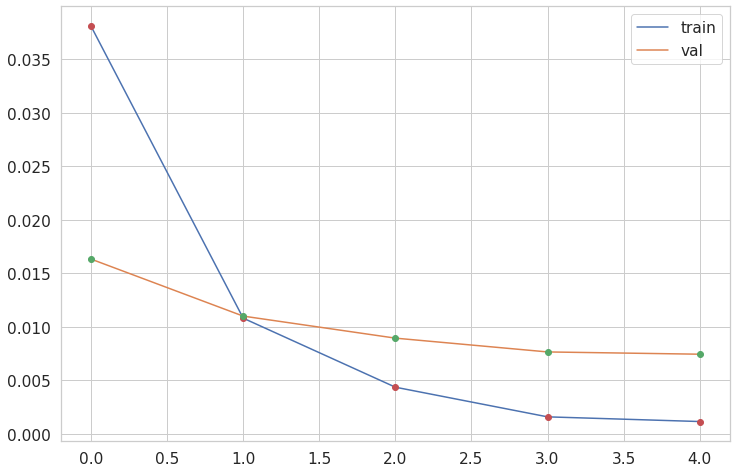

In [ ]:
import seaborn as sns

sns.set(style="whitegrid", font_scale=1.4)

# Построим график лосса при обучении и валидации

#Ваш код здесь
plt.figure(figsize=(12, 8))
plt.plot(losses['train'], label="train")
plt.plot(losses['val'], label="val")
plt.plot(losses['train'], 'ro')
plt.plot(losses['val'], 'go')
plt.legend()
plt.show()

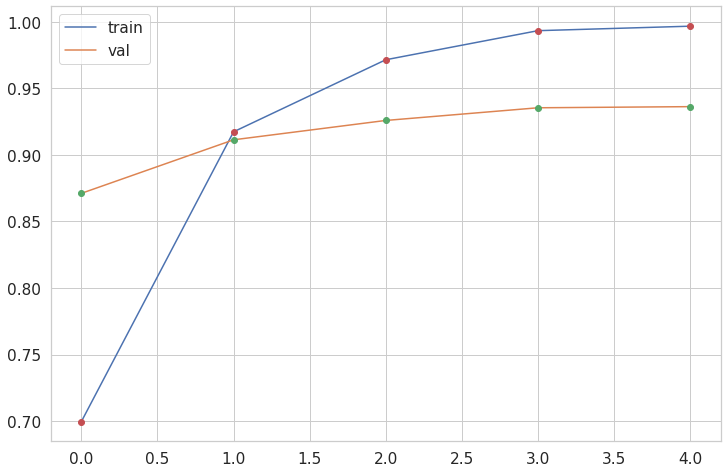

In [ ]:
import seaborn as sns

sns.set(style="whitegrid", font_scale=1.4)

# Построим график метрик качества при обучении и валидации

#Ваш код здесь
plt.figure(figsize=(12, 8))
plt.plot(accuracy_metric['train'], label="train")
plt.plot(accuracy_metric['val'], label="val")
plt.plot(accuracy_metric['train'], 'ro')
plt.plot(accuracy_metric['val'], 'go')
plt.legend()
plt.show()

<a id='Update_parameters_Oversampling_Alex_AdamW_summary'></a>

### Выводы из графиков и результатов расчетов

Качество модели впринципе хорошее, хоть и есть переобучение

[Перейти к "Оглавлению"](#Main)

<a id='Update_parameters_Oversampling_Alex_SGD'></a>

## Модель AlexNet с одним полносвязным слоем и оптимизатором SGD

[Перейти к "Оглавлению"](#Main)

<a id='Update_parameters_Oversampling_Alex_SGD_learn'></a>

### Обучение модели

[Перейти к "Оглавлению"](#Main)

In [ ]:
model_alex = models.alexnet(pretrained=True)
model_alex

AlexNet(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(11, 11), stride=(4, 4), padding=(2, 2))
    (1): ReLU(inplace=True)
    (2): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Conv2d(64, 192, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (4): ReLU(inplace=True)
    (5): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (6): Conv2d(192, 384, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (7): ReLU(inplace=True)
    (8): Conv2d(384, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (9): ReLU(inplace=True)
    (10): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (avgpool): AdaptiveAvgPool2d(output_size=(6, 6))
  (classifier): Sequential(
    (0): Dropout(p=0.5, inplace=False)
    (1): Linear(in_features=9216, out_features=4096, bias=True)
 

In [ ]:
# 0.9416 - on validation data - best
# nesterov=True
layers_to_unfreeze = 9

# Выключаем подсчет градиентов для слоев, которые не будем обучать
for param in model_alex.features[:-layers_to_unfreeze].parameters():
    param.requires_grad = False

# num_features - это размерность вектора фич, поступающего на вход FC-слою
num_features = 9216

# Заменяем Fully-Connected слой на наш линейный классификатор
model_alex.classifier = nn.Sequential(OrderedDict([
    ('batch_norm', nn.BatchNorm1d(num_features)),
    ('drop', nn.Dropout(p=0.3)),
    ('linerar1', nn.Linear(num_features, len(np.unique(train_val_labels))))
]))

# Использовать ли GPU
use_gpu = torch.cuda.is_available()
if use_gpu:
    model_alex = model_alex.cuda()

# В качестве cost function используем кросс-энтропию
loss_fn = nn.CrossEntropyLoss()

# В качестве оптимизатора - стохастический градиентный спуск
optimizer_ft = optim.SGD(model_alex.parameters(), lr=0.0004, momentum=0.9)

# Умножает learning_rate на 0.1 каждые 5 эпох (это одна из эвристик, не было на лекциях)
exp_lr_scheduler = lr_scheduler.StepLR(optimizer_ft, step_size=4, gamma=0.1)

In [ ]:
model_alex

AlexNet(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(11, 11), stride=(4, 4), padding=(2, 2))
    (1): ReLU(inplace=True)
    (2): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Conv2d(64, 192, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (4): ReLU(inplace=True)
    (5): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (6): Conv2d(192, 384, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (7): ReLU(inplace=True)
    (8): Conv2d(384, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (9): ReLU(inplace=True)
    (10): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (avgpool): AdaptiveAvgPool2d(output_size=(6, 6))
  (classifier): Sequential(
    (batch_norm): BatchNorm1d(9216, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    

In [ ]:
model_alex, losses, accuracy_metric = train_model(model_alex, loss_fn, optimizer_ft, 
                                                  exp_lr_scheduler, num_epochs=5)

Epoch::   0%|          | 0/5 [00:00<?, ?it/s]

/usr/local/lib/python3.7/dist-packages/torch/optim/lr_scheduler.py:134: UserWarning: Detected call of `lr_scheduler.step()` before `optimizer.step()`. In PyTorch 1.1.0 and later, you should call them in the opposite order: `optimizer.step()` before `lr_scheduler.step()`.  Failure to do this will result in PyTorch skipping the first value of the learning rate schedule. See more details at https://pytorch.org/docs/stable/optim.html#how-to-adjust-learning-rate
  "https://pytorch.org/docs/stable/optim.html#how-to-adjust-learning-rate", UserWarning)


train iter::   0%|          | 0/1103 [00:00<?, ?it/s]

val iter::   0%|          | 0/368 [00:00<?, ?it/s]

train iter::   0%|          | 0/1103 [00:00<?, ?it/s]

val iter::   0%|          | 0/368 [00:00<?, ?it/s]

train iter::   0%|          | 0/1103 [00:00<?, ?it/s]

val iter::   0%|          | 0/368 [00:00<?, ?it/s]

train iter::   0%|          | 0/1103 [00:00<?, ?it/s]

val iter::   0%|          | 0/368 [00:00<?, ?it/s]

train iter::   0%|          | 0/1103 [00:00<?, ?it/s]

val iter::   0%|          | 0/368 [00:00<?, ?it/s]

Training complete in 34m 44s
Best val Acc: 0.903094


<a id='Update_parameters_Oversampling_Alex_SGD_draw'></a>

### Смотрим на графики для модели

[Перейти к "Оглавлению"](#Main)

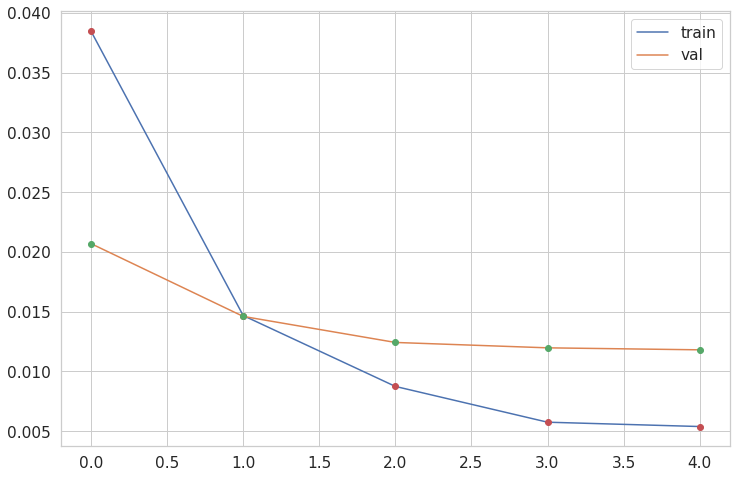

In [ ]:
import seaborn as sns

sns.set(style="whitegrid", font_scale=1.4)

# Построим график лосса при обучении и валидации

#Ваш код здесь
plt.figure(figsize=(12, 8))
plt.plot(losses['train'], label="train")
plt.plot(losses['val'], label="val")
plt.plot(losses['train'], 'ro')
plt.plot(losses['val'], 'go')
plt.legend()
plt.show()

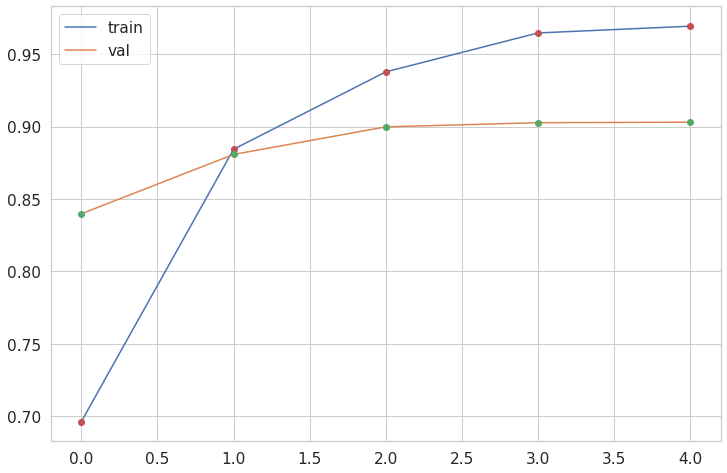

In [ ]:
import seaborn as sns

sns.set(style="whitegrid", font_scale=1.4)

# Построим график метрик качества при обучении и валидации

#Ваш код здесь
plt.figure(figsize=(12, 8))
plt.plot(accuracy_metric['train'], label="train")
plt.plot(accuracy_metric['val'], label="val")
plt.plot(accuracy_metric['train'], 'ro')
plt.plot(accuracy_metric['val'], 'go')
plt.legend()
plt.show()

<a id='Update_parameters_Oversampling_Alex_SGD_summary'></a>

### Выводы из графиков и результатов расчетов

Качество модели получилось хуже чем у двух предыдущих.
Что тоже результат

[Перейти к "Оглавлению"](#Main)

<a id='Update_parameters_Oversampling_Alex_twofull'></a>

## Модель AlexNet с двумя полносвязными слоями

[Перейти к "Оглавлению"](#Main)

<a id='Update_parameters_Oversampling_Alex_twofull_learn'></a>

### Обучение модели

[Перейти к "Оглавлению"](#Main)

In [ ]:
model = models.alexnet(pretrained=True)
model

AlexNet(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(11, 11), stride=(4, 4), padding=(2, 2))
    (1): ReLU(inplace=True)
    (2): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Conv2d(64, 192, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (4): ReLU(inplace=True)
    (5): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (6): Conv2d(192, 384, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (7): ReLU(inplace=True)
    (8): Conv2d(384, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (9): ReLU(inplace=True)
    (10): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (avgpool): AdaptiveAvgPool2d(output_size=(6, 6))
  (classifier): Sequential(
    (0): Dropout(p=0.5, inplace=False)
    (1): Linear(in_features=9216, out_features=4096, bias=True)
 

In [ ]:
# 0.9056 - layers=6 - p=0.7 - d=0%
# 0.9274 - layers=9 - p=0.7 - d=0%
# 0.9470 - layers=9 - p=0.5 - d=4% - есть возможность увеличить число эпох
# 0.9470 - layers=9 - p=0.3 - d=5% - есть возможность увеличить число эпох
# 0.9141 - layers=12 - p=0.7 - d=0%
layers_to_unfreeze = 7

# Выключаем подсчет градиентов для слоев, которые не будем обучать
for param in model.features[:-layers_to_unfreeze].parameters():
    param.requires_grad = False


# num_features -- это размерность вектора фич, поступающего на вход FC-слою
num_features = 9216

# Заменяем Fully-Connected слой на наш линейный классификатор
model.classifier = nn.Sequential(OrderedDict([
    ('batch_norm', nn.BatchNorm1d(num_features)),
    ('drop1', nn.Dropout(p=0.7)),
    ('linerar1', nn.Linear(in_features=num_features, out_features=1000)),
    ('relu', nn.ReLU()),
    ('drop2', nn.Dropout(p=0.7)),
    ('linerar2', nn.Linear(in_features=1000, out_features=len(np.unique(train_val_labels))))
]))


# Использовать ли GPU
use_gpu = torch.cuda.is_available()
if use_gpu:
    model = model.cuda()

# В качестве cost function используем кросс-энтропию
loss_fn = nn.CrossEntropyLoss()

# В качестве оптимизатора - стохастический градиентный спуск
optimizer_ft = optim.Adam(model.parameters(), lr=1e-4)

# Умножает learning_rate на 0.1 каждые 4 эпох (это одна из эвристик, не было на лекциях)
exp_lr_scheduler = lr_scheduler.StepLR(optimizer_ft, step_size=2, gamma=0.1)

In [ ]:
model

AlexNet(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(11, 11), stride=(4, 4), padding=(2, 2))
    (1): ReLU(inplace=True)
    (2): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Conv2d(64, 192, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (4): ReLU(inplace=True)
    (5): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (6): Conv2d(192, 384, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (7): ReLU(inplace=True)
    (8): Conv2d(384, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (9): ReLU(inplace=True)
    (10): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (avgpool): AdaptiveAvgPool2d(output_size=(6, 6))
  (classifier): Sequential(
    (batch_norm): BatchNorm1d(9216, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    

In [ ]:
model, losses, accuracy_metric = train_model(model, loss_fn, optimizer_ft, 
                                             exp_lr_scheduler, num_epochs=3)

Epoch::   0%|          | 0/3 [00:00<?, ?it/s]

/usr/local/lib/python3.7/dist-packages/torch/optim/lr_scheduler.py:134: UserWarning: Detected call of `lr_scheduler.step()` before `optimizer.step()`. In PyTorch 1.1.0 and later, you should call them in the opposite order: `optimizer.step()` before `lr_scheduler.step()`.  Failure to do this will result in PyTorch skipping the first value of the learning rate schedule. See more details at https://pytorch.org/docs/stable/optim.html#how-to-adjust-learning-rate
  "https://pytorch.org/docs/stable/optim.html#how-to-adjust-learning-rate", UserWarning)


train iter::   0%|          | 0/1103 [00:00<?, ?it/s]

val iter::   0%|          | 0/368 [00:00<?, ?it/s]

train iter::   0%|          | 0/1103 [00:00<?, ?it/s]

val iter::   0%|          | 0/368 [00:00<?, ?it/s]

train iter::   0%|          | 0/1103 [00:00<?, ?it/s]

val iter::   0%|          | 0/368 [00:00<?, ?it/s]

Training complete in 21m 16s
Best val Acc: 0.851411


<a id='Update_parameters_Oversampling_Alex_twofull_draw'></a>

### Смотрим на графики для модели

[Перейти к "Оглавлению"](#Main)

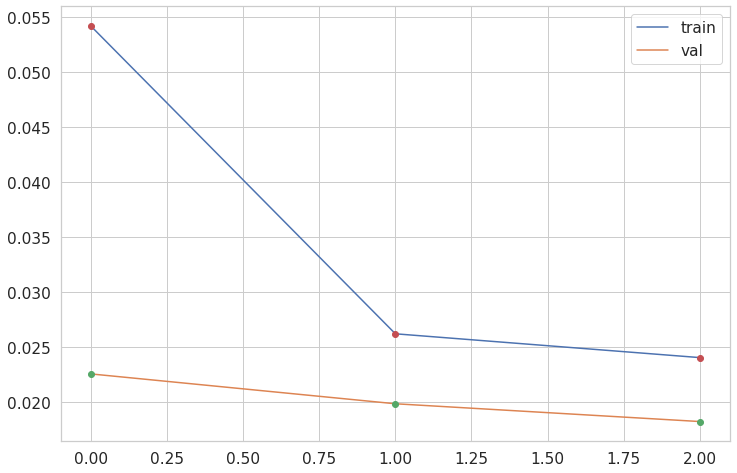

In [ ]:
import seaborn as sns

sns.set(style="whitegrid", font_scale=1.4)

# Построим график лосса при обучении и валидации

#Ваш код здесь
plt.figure(figsize=(12, 8))
plt.plot(losses['train'], label="train")
plt.plot(losses['val'], label="val")
plt.plot(losses['train'], 'ro')
plt.plot(losses['val'], 'go')
plt.legend()
plt.show()

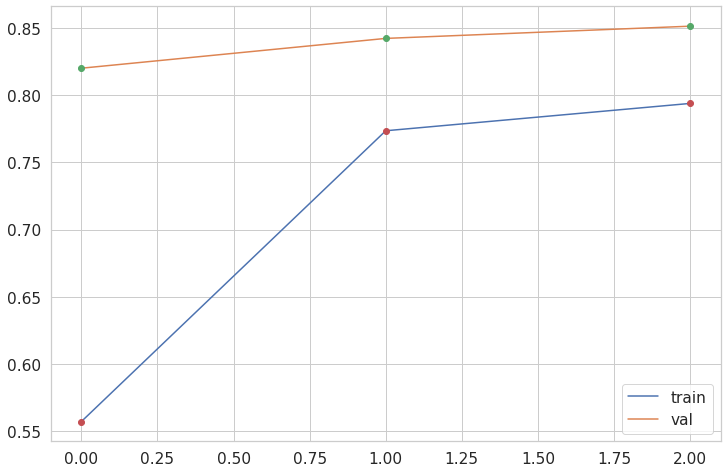

In [ ]:
import seaborn as sns

sns.set(style="whitegrid", font_scale=1.4)

# Построим график метрик качества при обучении и валидации

#Ваш код здесь
plt.figure(figsize=(12, 8))
plt.plot(accuracy_metric['train'], label="train")
plt.plot(accuracy_metric['val'], label="val")
plt.plot(accuracy_metric['train'], 'ro')
plt.plot(accuracy_metric['val'], 'go')
plt.legend()
plt.show()

<a id='Update_parameters_Oversampling_Alex_twofull_summary'></a>

### Выводы из графиков и результатов расчетов

Предсказания этой модели будет использоваться в дальнейшем для скора на kaggle

[Перейти к "Оглавлению"](#Main)

<a id='Prepare_data_best_Undersampling'></a>

# Преобразование картинок в классах. Недосэмлирование

Использована модель AlexNet на данных, на которых был применено недосэмлирование (Undersampling the majority class). Количество представителей в каждом классе выравнивалось до одинакового значения (примерно 550), где это было возможно. (Преобразовываться будут изначальные данные, т.е. не будут использоваться данные после пункта 3. Это говорит о том, что нужно будет заново все подключать)   

[Перейти к "Оглавлению"](#Main)

<a id='Prepare_data_best_Undersampling_prepare'></a>

## Делаем всю необходимую работу

[Перейти к "Оглавлению"](#Main)

In [ ]:
def train_model(model, criterion, optimizer, scheduler, num_epochs=5):
    since = time.time()

    best_model_wts = model.state_dict()
    best_acc = 0.0
    
    #Ваш код здесь
    losses = {'train': [], "val": []}
    f1_metric = {'train': [], "val": []}
    accuracy_metric = {'train': [], "val": []}

    pbar = trange(num_epochs, desc="Epoch:")

    for epoch in pbar:

        # каждя эпоха имеет обучающую и тестовую стадии
        for phase in ['train', 'val']:
            if phase == 'train':
                scheduler.step()
                model.train(True)  # установаить модель в режим обучения
            else:
                model.eval()

            running_loss = 0.0
            running_corrects = 0

            # итерируемся по батчам
            for data in tqdm(dataloaders[phase], leave=False, desc=f"{phase} iter:"):
                # получаем картинки и метки
                inputs, labels = data

                # оборачиваем в переменные
                if use_gpu:
                    inputs = inputs.cuda()
                    labels = labels.cuda()
                else:
                    inputs, labels = inputs, labels

                # инициализируем градиенты параметров
                if phase=="train":
                    optimizer.zero_grad()

                # forward pass
                if phase == "eval":
                    with torch.no_grad():
                        outputs = model(inputs)
                else:
                    outputs = model(inputs)
                preds = torch.argmax(outputs, -1)
                loss = criterion(outputs, labels)
                
                # backward pass + оптимизируем только если это стадия обучения
                if phase == 'train':
                    loss.backward()
                    optimizer.step()

                # статистика
                running_loss += loss.item()
                running_corrects += int(torch.sum(preds == labels.data))

            epoch_loss = running_loss / dataset_sizes[phase]
            epoch_acc = running_corrects / dataset_sizes[phase]
           
            # Ваш код здесь
            losses[phase].append(epoch_loss)
            accuracy_metric[phase].append(epoch_acc)

            pbar.set_description('{} Loss: {:.4f} Acc: {:.4f}'.format(
                                    phase, epoch_loss, epoch_acc))

            # если достиглось лучшее качество, то запомним веса модели
            if phase == 'val' and epoch_acc > best_acc:
                best_acc = epoch_acc
                best_model_wts = model.state_dict()

    time_elapsed = time.time() - since
    print('Training complete in {:.0f}m {:.0f}s'.format(
        time_elapsed // 60, time_elapsed % 60))
    print('Best val Acc: {:4f}'.format(best_acc))

    # загрузим лучшие веса модели
    model.load_state_dict(best_model_wts)
    return model, losses, accuracy_metric

<a id='Prepare_data_best_Undersampling_bernoulli'></a>

### Делаем очистку данных по уровню в 550 записей в одном признаке применяя распределение Бернулли

[Перейти к "Оглавлению"](#Main)

20933


<BarContainer object of 42 artists>

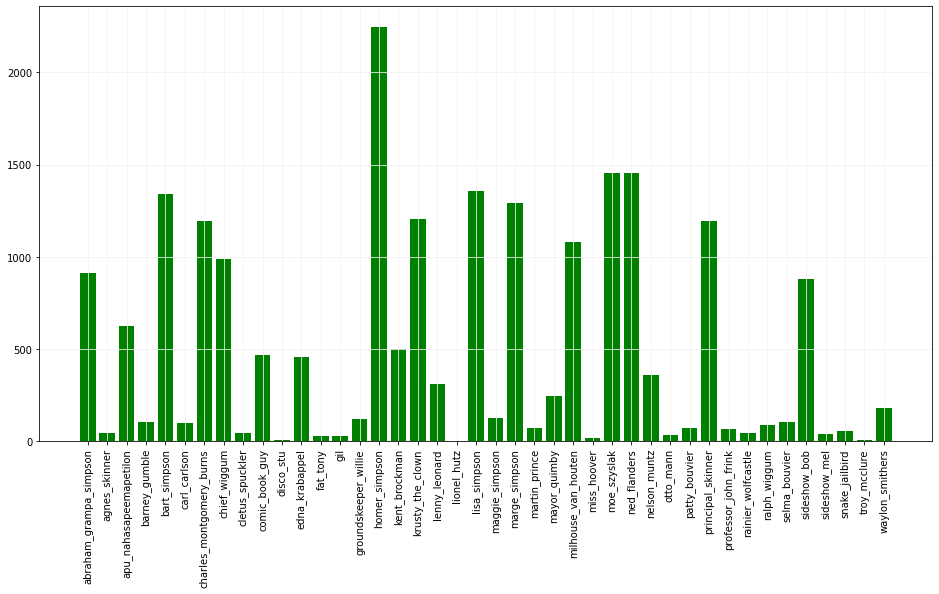

In [ ]:
TRAIN_DIR = Path('/content/train')
TEST_DIR = Path('/content/test')

# Добавляет в переменную файлы из директории
train_val_files = sorted(list(TRAIN_DIR.rglob('*.jpg')))
test_files = sorted(list(TEST_DIR.rglob('*.jpg')))
print(len(train_val_files))

# Словарь с уникальными ключами по именам персонажей
d_names = {}
max_elem_name = ''
max_elem_num = 0
for i in train_val_files:
    if i.parent.name in d_names:
        d_names[i.parent.name] += 1
    else:
        d_names[i.parent.name] = 1
    if d_names[i.parent.name]>max_elem_num:
        max_elem_name = i.parent.name
        max_elem_num = d_names[i.parent.name]

# Отрисовка классов
plt.figure(figsize=(16, 8))
plt.xticks(rotation=90)
plt.grid(color='0.95')
plt.bar(d_names.keys(), d_names.values(), color='g')

In [ ]:
# Внимание! Нужно по принту понять как отработала данная ячейка
from scipy.stats import bernoulli


new_train_val_files = []
for i in train_val_files:
    if d_names[i.parent.name] >= 550:
        if bernoulli.rvs(size=1, p=(500/d_names[i.parent.name])):
            new_train_val_files.append(i)
    else:
        new_train_val_files.append(i)
print(len(new_train_val_files))

10686


<a id='Prepare_data_best_Undersampling_dict'></a>

### Получаем словарь всех классов

[Перейти к "Оглавлению"](#Main)

<BarContainer object of 42 artists>

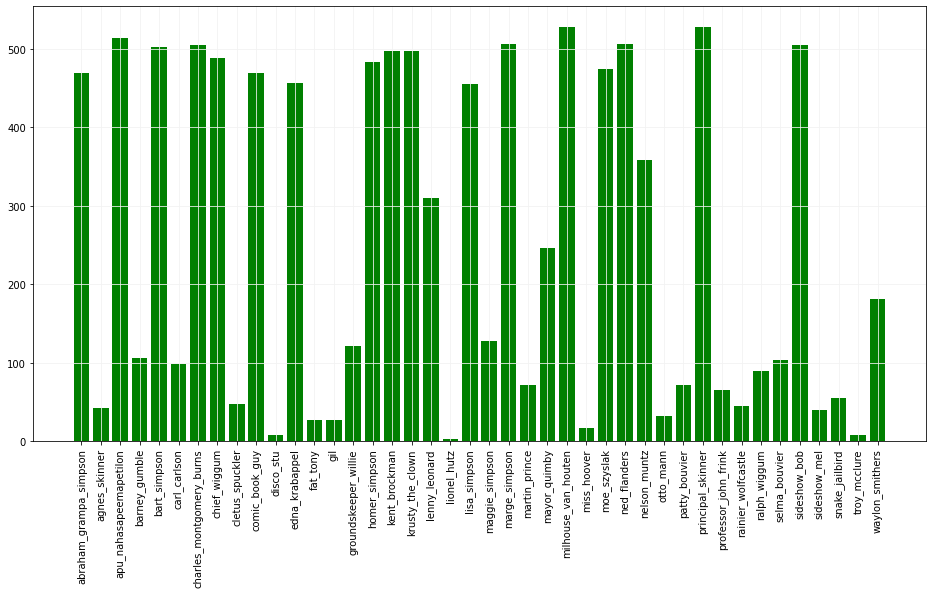

In [ ]:
# Словарь с уникальными ключами по именам персонажей
d_names = {}
max_elem_name = ''
max_elem_num = 0
for i in new_train_val_files:
    if i.parent.name in d_names:
        d_names[i.parent.name] += 1
    else:
        d_names[i.parent.name] = 1
    if d_names[i.parent.name]>max_elem_num:
        max_elem_name = i.parent.name
        max_elem_num = d_names[i.parent.name]

plt.figure(figsize=(16, 8))
plt.xticks(rotation=90)
plt.grid(color='0.95')
plt.bar(d_names.keys(), d_names.values(), color='g')

<a id='Prepare_data_best_Undersampling_transforms'></a>

### Использование torchvision.transforms

[Перейти к "Оглавлению"](#Main)

In [ ]:
import torchvision.transforms as T


def save_hflipper(path_in, image):
    """
    Добавление нового изображения с преобразованием RandomHorizontalFlip
    """
    transformed_imgs = T.RandomHorizontalFlip(p=1)(image)
    s = str(path_in).split('/')
    s[-1] = s[-1].replace('.', '_rhf.')
    new_path = '/'.join(s)
    transformed_imgs.save(new_path)


def save_vflipper(path_in, image):
    """
    Добавление нового изображения с преобразованием RandomVerticalFlip
    """
    transformed_imgs = T.RandomVerticalFlip(p=1)(image)
    s = str(path_in).split('/')
    s[-1] = s[-1].replace('.', '_rvf.')
    new_path = '/'.join(s)
    transformed_imgs.save(new_path)


def save_jitter(path_in, image):
    """
    Добавление нового изображения с преобразованием ColorJitter
    """
    transformed_imgs = T.ColorJitter(brightness=.5, hue=.3)(image)
    s = str(path_in).split('/')
    s[-1] = s[-1].replace('.', '_cj.')
    new_path = '/'.join(s)
    transformed_imgs.save(new_path)


def save_solorizer(path_in, image):
    """
    Добавление нового изображения с преобразованием RandomSolarize
    """
    transformed_imgs = T.RandomSolarize(threshold=113.0, p=1)(image)
    s = str(path_in).split('/')
    s[-1] = s[-1].replace('.', '_rs.')
    new_path = '/'.join(s)
    transformed_imgs.save(new_path)


def save_equalizer(path_in, image):
    """
    Добавление нового изображения с преобразованием RandomEqualize
    """
    transformed_imgs = T.RandomEqualize(p=1)(image)
    s = str(path_in).split('/')
    s[-1] = s[-1].replace('.', '_re.')
    new_path = '/'.join(s)
    transformed_imgs.save(new_path)


def save_rotation(path_in, image):
    """
    Добавление 4 новых изображений с преобразованием RandomRotation
    """
    transformed_imgs = T.RandomRotation(degrees=(0, 180))
    rotated_imgs = [transformed_imgs(image) for _ in range(4)]

    for i in range(len(rotated_imgs)):
        s = str(path_in).split('/')
        s[-1] = s[-1].replace('.', f'_rr{i}.')
        new_path = '/'.join(s)
        rotated_imgs[i].save(new_path)


def save_perspective(path_in, image):
    """
    Добавление 4 новых изображений с преобразованием RandomPerspective
    """
    transformed_imgs = T.RandomPerspective(distortion_scale=0.6, p=1.0)
    perspective_imgs = [transformed_imgs(image) for _ in range(4)]

    for i in range(len(perspective_imgs)):
        s = str(path_in).split('/')
        s[-1] = s[-1].replace('.', f'_rr{i}.')
        new_path = '/'.join(s)
        perspective_imgs[i].save(new_path)


print("Добавление в выборку обновленных фото")
for i in tqdm(train_val_files):
    orig_img = Image.open(i)

    if 200 <= d_names[i.parent.name] <= 400:
        save_hflipper(path_in=i, image=orig_img)

    elif 200 <= d_names[i.parent.name] < 100:
        save_hflipper(path_in=i, image=orig_img)
        save_vflipper(path_in=i, image=orig_img)

    elif 50 <= d_names[i.parent.name] < 100:
        save_hflipper(path_in=i, image=orig_img)
        save_vflipper(path_in=i, image=orig_img)
        save_jitter(path_in=i, image=orig_img)

    elif d_names[i.parent.name] < 50:
        save_hflipper(path_in=i, image=orig_img)
        save_vflipper(path_in=i, image=orig_img)
        save_jitter(path_in=i, image=orig_img)
        save_solorizer(path_in=i, image=orig_img)
        save_equalizer(path_in=i, image=orig_img)
        save_equalizer(path_in=i, image=orig_img)
        save_perspective(path_in=i, image=orig_img)

print("Окончание добавление в выборку обновленных фото")

Добавление в выборку обновленных фото


  0%|          | 0/20933 [00:00<?, ?it/s]

Окончание добавление в выборку обновленных фото


<a id='Update_parameters_Undersampling_update'></a>

### Обновление переменных

[Перейти к "Оглавлению"](#Main)

<BarContainer object of 42 artists>

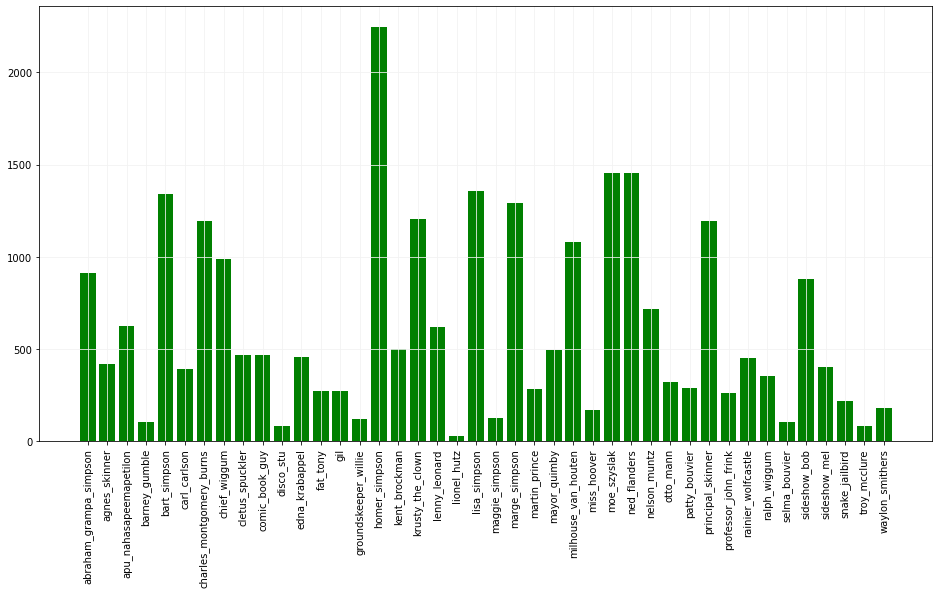

In [ ]:
TRAIN_DIR = Path('/content/train')
TEST_DIR = Path('/content/test')

# Добавляет в переменную файлы из директории
train_val_files = sorted(list(TRAIN_DIR.rglob('*.jpg')))
test_files = sorted(list(TEST_DIR.rglob('*.jpg')))

# Словарь с уникальными ключами по именам персонажей
d_names = {}
max_elem_name = ''
max_elem_num = 0
for i in train_val_files:
    if i.parent.name in d_names:
        d_names[i.parent.name] += 1
    else:
        d_names[i.parent.name] = 1
    if d_names[i.parent.name]>max_elem_num:
        max_elem_name = i.parent.name
        max_elem_num = d_names[i.parent.name]

plt.figure(figsize=(16, 8))
plt.xticks(rotation=90)
plt.grid(color='0.95')
plt.bar(d_names.keys(), d_names.values(), color='g')

<a id='Update_parameters_Undersampling_bernoulli_final'></a>

### Делаем очистку данных по уровню в 550 записей в одном признаке применяя распределение Бернулли к готовому датасету

[Перейти к "Оглавлению"](#Main)

In [ ]:
# Внимание! Нужно по принту понять как отработала данная ячейка
from scipy.stats import bernoulli


new_train_val_files = []
for i in train_val_files:
    if d_names[i.parent.name] >= 550:
        if bernoulli.rvs(size=1, p=(500/d_names[i.parent.name])):
            new_train_val_files.append(i)
    else:
        new_train_val_files.append(i)

print(len(new_train_val_files))

15260


<a id='Update_parameters_Undersampling_data_final'></a>

### Отрисовка готового датасета по количеству данных для каждого класса

[Перейти к "Оглавлению"](#Main)

<BarContainer object of 42 artists>

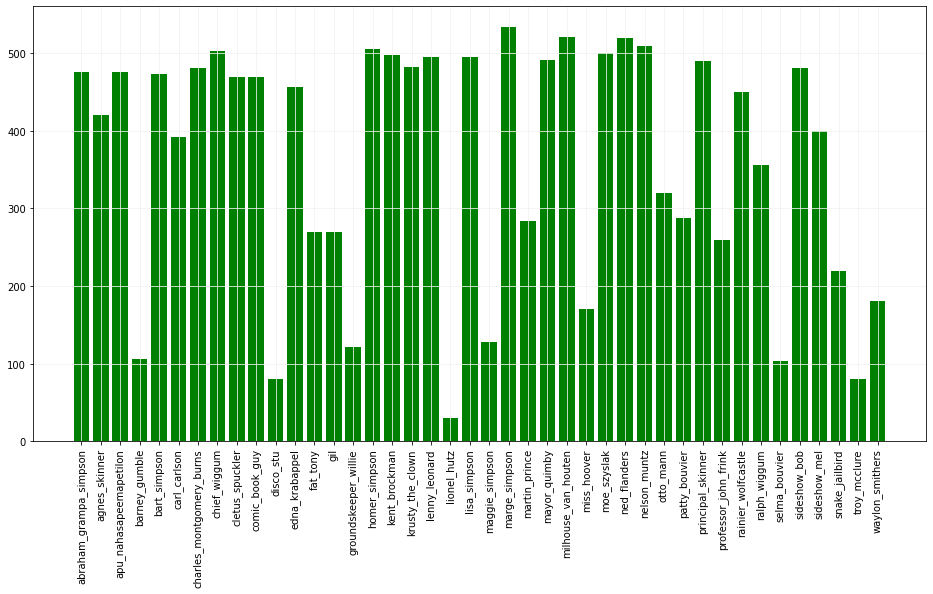

In [ ]:
train_val_files = new_train_val_files

# Словарь с уникальными ключами по именам персонажей
d_names = {}
max_elem_name = ''
max_elem_num = 0
for i in train_val_files:
    if i.parent.name in d_names:
        d_names[i.parent.name] += 1
    else:
        d_names[i.parent.name] = 1
    if d_names[i.parent.name]>max_elem_num:
        max_elem_name = i.parent.name
        max_elem_num = d_names[i.parent.name]

plt.figure(figsize=(16, 8))
plt.xticks(rotation=90)
plt.grid(color='0.95')
plt.bar(d_names.keys(), d_names.values(), color='g')

In [ ]:
from sklearn.model_selection import train_test_split

train_val_labels = [path.parent.name for path in train_val_files]
train_files, val_files = train_test_split(train_val_files, test_size=0.25, \
                                          stratify=train_val_labels, random_state=257)

In [ ]:
# # train - 0.9750 / val - 0.852
# from sklearn.preprocessing import LabelEncoder


# val_dataset = SimpsonsDataset(val_files, mode='val')
# train_dataset = SimpsonsDataset(train_files, mode='train')

# dataloaders = {
#     'train': torch.utils.data.DataLoader(train_dataset, batch_size=8, shuffle=True, num_workers=0),
#     'val': torch.utils.data.DataLoader(val_dataset, batch_size=8, shuffle=False, num_workers=0)       
# }

# dataset_sizes = {
#     'train': len(train_dataset),
#     'val': len(val_dataset)
# }

# print(dataset_sizes)
# print(len(dataloaders['train']))
# print(len(dataloaders['val']))
# ################################################################################


################################################################################
# train - 0.99 / val - 0.86
from sklearn.preprocessing import LabelEncoder


val_dataset = SimpsonsDataset(val_files, mode='val')
train_dataset = SimpsonsDataset(train_files, mode='train')

dataloaders = {
    'train': torch.utils.data.DataLoader(train_dataset, batch_size=16, shuffle=True, 
                                         num_workers=0, drop_last=True),
    'val': torch.utils.data.DataLoader(val_dataset, batch_size=16, shuffle=False, 
                                       num_workers=0, drop_last=True)       
}

dataset_sizes = {
    'train': len(train_dataset),
    'val': len(val_dataset)
}

print(dataset_sizes)
print(len(dataloaders['train']))
print(len(dataloaders['val']))

{'train': 11445, 'val': 3815}
715
238


<a id='Update_parameters_Undersampling_data_final_draw'></a>

### Отрисовка рандомных преобразованных изображений из нового датасета

[Перейти к "Оглавлению"](#Main)

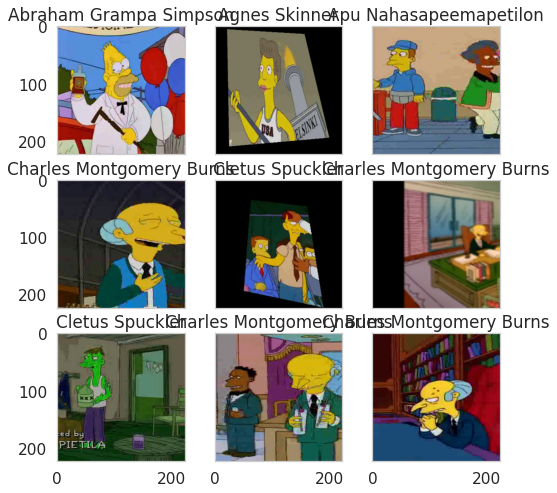

In [ ]:
fig, ax = plt.subplots(nrows=3, ncols=3,figsize=(8, 8), \
                        sharey=True, sharex=True)
for fig_x in ax.flatten():
    random_characters = int(np.random.uniform(0,1000))
    im_val, label = val_dataset[random_characters]
    img_label = " ".join(map(lambda x: x.capitalize(),\
                val_dataset.label_encoder.inverse_transform([label])[0].split('_')))
    imshow(im_val.data.cpu(), \
          title=img_label,plt_ax=fig_x)

<a id='Update_parameters_Undersampling_Alex_Adam'></a>

## Модель AlexNet с одним полносвязным слоем и оптимизатором Adam

[Перейти к "Оглавлению"](#Main)

<a id='Update_parameters_Undersampling_Alex_Adam_learn'></a>

### Обучение модели

[Перейти к "Оглавлению"](#Main)

In [ ]:
model_alex = models.alexnet(pretrained=True)
model_alex

AlexNet(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(11, 11), stride=(4, 4), padding=(2, 2))
    (1): ReLU(inplace=True)
    (2): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Conv2d(64, 192, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (4): ReLU(inplace=True)
    (5): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (6): Conv2d(192, 384, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (7): ReLU(inplace=True)
    (8): Conv2d(384, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (9): ReLU(inplace=True)
    (10): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (avgpool): AdaptiveAvgPool2d(output_size=(6, 6))
  (classifier): Sequential(
    (0): Dropout(p=0.5, inplace=False)
    (1): Linear(in_features=9216, out_features=4096, bias=True)
 

In [ ]:
# ########################################################################################
# # 0.8686 - on validation data - best
# layers_to_unfreeze = 6

# # Выключаем подсчет градиентов для слоев, которые не будем обучать
# for param in model_alex.features[:-layers_to_unfreeze].parameters():
#     param.requires_grad = False

# # num_features - это размерность вектора фич, поступающего на вход FC-слою
# num_features = 9216

# # Заменяем Fully-Connected слой на наш линейный классификатор
# model_alex.classifier = nn.Sequential(OrderedDict([
#     ('batch_norm', nn.BatchNorm1d(num_features)),
#     ('drop', nn.Dropout(p=0.3)),
#     ('linerar1', nn.Linear(num_features, len(np.unique(train_val_labels))))
# ]))


# # Использовать ли GPU
# use_gpu = torch.cuda.is_available()
# if use_gpu:
#     model_alex = model_alex.cuda()

# # В качестве cost function используем кросс-энтропию
# loss_fn = nn.CrossEntropyLoss()

# # В качестве оптимизатора - стохастический градиентный спуск
# optimizer_ft = optim.Adam(model_alex.parameters(), lr=1e-4)

# # Умножает learning_rate на 0.1 каждые 5 эпох (это одна из эвристик, не было на лекциях)
# exp_lr_scheduler = lr_scheduler.StepLR(optimizer_ft, step_size=4, gamma=0.1)
# ########################################################################################


# ########################################################################################
# # 0.8755 - on validation data - best - p=0.3 - d = ?%
# # 0.8755 - on validation data - best - p=0.5 - d > 10%
# layers_to_unfreeze = 9

# # Выключаем подсчет градиентов для слоев, которые не будем обучать
# for param in model_alex.features[:-layers_to_unfreeze].parameters():
#     param.requires_grad = False

# # num_features - это размерность вектора фич, поступающего на вход FC-слою
# num_features = 9216

# # Заменяем Fully-Connected слой на наш линейный классификатор
# model_alex.classifier = nn.Sequential(OrderedDict([
#     ('batch_norm', nn.BatchNorm1d(num_features)),
#     ('drop', nn.Dropout(p=0.5)),
#     ('linerar1', nn.Linear(num_features, len(np.unique(train_val_labels))))
# ]))

# # Использовать ли GPU
# use_gpu = torch.cuda.is_available()
# if use_gpu:
#     model_alex = model_alex.cuda()

# # В качестве cost function используем кросс-энтропию
# loss_fn = nn.CrossEntropyLoss()

# # В качестве оптимизатора - стохастический градиентный спуск
# optimizer_ft = optim.Adam(model_alex.parameters(), lr=1e-4)

# # Умножает learning_rate на 0.1 каждые 5 эпох (это одна из эвристик, не было на лекциях)
# exp_lr_scheduler = lr_scheduler.StepLR(optimizer_ft, step_size=4, gamma=0.1)
# ########################################################################################


########################################################################################
# 0. - on validation data - best - p=0.1 - d > 10 %
# 0.8930 - on validation data - best - p=0.3 - d = 10%
# 0.8755 - on validation data - best - p=0.5 - d = 10%
# 0. - on validation data - best - p=0.7 - d = %
layers_to_unfreeze = 12

# Выключаем подсчет градиентов для слоев, которые не будем обучать
for param in model_alex.features[:-layers_to_unfreeze].parameters():
    param.requires_grad = False

# num_features - это размерность вектора фич, поступающего на вход FC-слою
num_features = 9216

# Заменяем Fully-Connected слой на наш линейный классификатор
model_alex.classifier = nn.Sequential(OrderedDict([
    ('batch_norm', nn.BatchNorm1d(num_features)),
    ('drop', nn.Dropout(p=0.7)),
    ('linerar1', nn.Linear(num_features, len(np.unique(train_val_labels))))
]))

# Использовать ли GPU
use_gpu = torch.cuda.is_available()
if use_gpu:
    model_alex = model_alex.cuda()

# В качестве cost function используем кросс-энтропию
loss_fn = nn.CrossEntropyLoss()

# В качестве оптимизатора - стохастический градиентный спуск
optimizer_ft = optim.Adam(model_alex.parameters(), lr=3e-4)

# Умножает learning_rate на 0.1 каждые 5 эпох (это одна из эвристик, не было на лекциях)
exp_lr_scheduler = lr_scheduler.StepLR(optimizer_ft, step_size=4, gamma=0.1)
########################################################################################

In [ ]:
model_alex

AlexNet(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(11, 11), stride=(4, 4), padding=(2, 2))
    (1): ReLU(inplace=True)
    (2): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Conv2d(64, 192, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (4): ReLU(inplace=True)
    (5): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (6): Conv2d(192, 384, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (7): ReLU(inplace=True)
    (8): Conv2d(384, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (9): ReLU(inplace=True)
    (10): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (avgpool): AdaptiveAvgPool2d(output_size=(6, 6))
  (classifier): Sequential(
    (batch_norm): BatchNorm1d(9216, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    

In [ ]:
model_alex, losses, accuracy_metric = train_model(model_alex, loss_fn, optimizer_ft, exp_lr_scheduler, 
                                                  num_epochs=5)


Epoch::   0%|          | 0/5 [00:00<?, ?it/s]

/usr/local/lib/python3.7/dist-packages/torch/optim/lr_scheduler.py:134: UserWarning: Detected call of `lr_scheduler.step()` before `optimizer.step()`. In PyTorch 1.1.0 and later, you should call them in the opposite order: `optimizer.step()` before `lr_scheduler.step()`.  Failure to do this will result in PyTorch skipping the first value of the learning rate schedule. See more details at https://pytorch.org/docs/stable/optim.html#how-to-adjust-learning-rate
  "https://pytorch.org/docs/stable/optim.html#how-to-adjust-learning-rate", UserWarning)


train iter::   0%|          | 0/715 [00:00<?, ?it/s]

val iter::   0%|          | 0/238 [00:00<?, ?it/s]

train iter::   0%|          | 0/715 [00:00<?, ?it/s]

val iter::   0%|          | 0/238 [00:00<?, ?it/s]

train iter::   0%|          | 0/715 [00:00<?, ?it/s]

val iter::   0%|          | 0/238 [00:00<?, ?it/s]

train iter::   0%|          | 0/715 [00:00<?, ?it/s]

val iter::   0%|          | 0/238 [00:00<?, ?it/s]

train iter::   0%|          | 0/715 [00:00<?, ?it/s]

val iter::   0%|          | 0/238 [00:00<?, ?it/s]

Training complete in 12m 3s
Best val Acc: 0.635387


<a id='Update_parameters_Undersampling_Alex_Adam_draw'></a>

### Смотрим на графики для модели

[Перейти к "Оглавлению"](#Main)

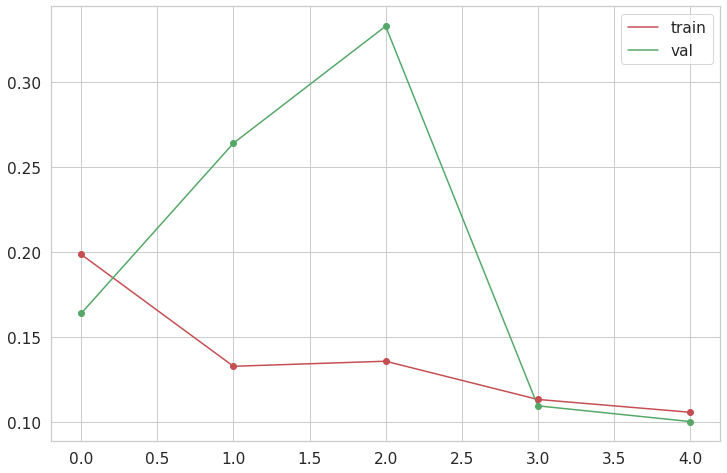

In [ ]:
import seaborn as sns

sns.set(style="whitegrid", font_scale=1.4)

# Построим график лосса при обучении и валидации

#Ваш код здесь
plt.figure(figsize=(12, 8))
plt.plot(losses['train'], 'r-', label="train")
plt.plot(losses['val'], 'g-', label="val")
plt.plot(losses['train'], 'ro')
plt.plot(losses['val'], 'go')
plt.legend()
plt.show()

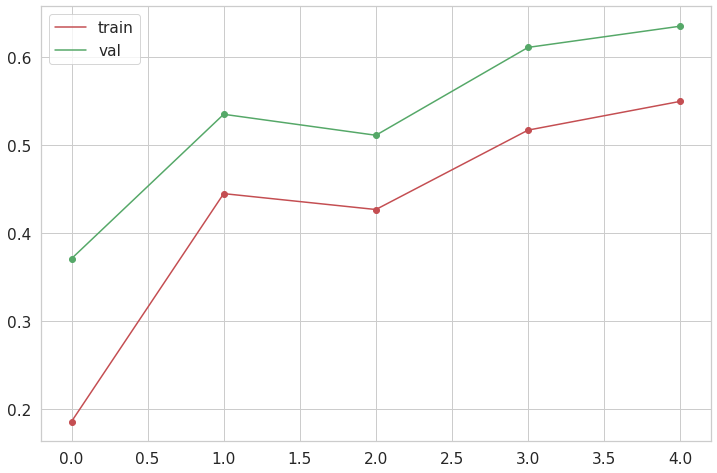

In [ ]:
import seaborn as sns

sns.set(style="whitegrid", font_scale=1.4)

# Построим график метрик качества при обучении и валидации

#Ваш код здесь
plt.figure(figsize=(12, 8))
plt.plot(accuracy_metric['train'], 'r-', label="train")
plt.plot(accuracy_metric['val'], 'g-', label="val")
plt.plot(accuracy_metric['train'], 'ro')
plt.plot(accuracy_metric['val'], 'go')
plt.legend()
plt.show()

<a id='Update_parameters_Undersampling_Alex_Adam_summary'></a>

### Выводы из графиков и результатов расчетов

Качество оставляет желать лучшего. 
Скорость обучения довольно низка.
Лучше не использовать для предсказаний данную модель на этих данных

[Перейти к "Оглавлению"](#Main)

<a id='Update_parameters_Undersampling_Alex_AdamW'></a>

## Модель AlexNet с одним полносвязным слоем и оптимизатором AdamW

[Перейти к "Оглавлению"](#Main)

<a id='Update_parameters_Undersampling_Alex_AdamW_learn'></a>

### Обучение модели

[Перейти к "Оглавлению"](#Main)

In [ ]:
model_alex = models.alexnet(pretrained=True)
model_alex

AlexNet(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(11, 11), stride=(4, 4), padding=(2, 2))
    (1): ReLU(inplace=True)
    (2): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Conv2d(64, 192, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (4): ReLU(inplace=True)
    (5): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (6): Conv2d(192, 384, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (7): ReLU(inplace=True)
    (8): Conv2d(384, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (9): ReLU(inplace=True)
    (10): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (avgpool): AdaptiveAvgPool2d(output_size=(6, 6))
  (classifier): Sequential(
    (0): Dropout(p=0.5, inplace=False)
    (1): Linear(in_features=9216, out_features=4096, bias=True)
 

In [ ]:
########################################################################################
# 0.9416 - on validation data - best
layers_to_unfreeze = 6

# Выключаем подсчет градиентов для слоев, которые не будем обучать
for param in model_alex.features[:-layers_to_unfreeze].parameters():
    param.requires_grad = False

# num_features - это размерность вектора фич, поступающего на вход FC-слою
num_features = 9216

# Заменяем Fully-Connected слой на наш линейный классификатор
model_alex.classifier = nn.Sequential(OrderedDict([
    ('batch_norm', nn.BatchNorm1d(num_features)),
    ('drop', nn.Dropout(p=0.3)),
    ('linerar1', nn.Linear(num_features, len(np.unique(train_val_labels))))
]))


# Использовать ли GPU
use_gpu = torch.cuda.is_available()
if use_gpu:
    model_alex = model_alex.cuda()

# В качестве cost function используем кросс-энтропию
loss_fn = nn.CrossEntropyLoss()

# В качестве оптимизатора - стохастический градиентный спуск
optimizer_ft = optim.AdamW(model_alex.parameters(), lr=1e-4)

# Умножает learning_rate на 0.1 каждые 5 эпох (это одна из эвристик, не было на лекциях)
exp_lr_scheduler = lr_scheduler.StepLR(optimizer_ft, step_size=4, gamma=0.1)
########################################################################################

In [ ]:
model_alex

AlexNet(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(11, 11), stride=(4, 4), padding=(2, 2))
    (1): ReLU(inplace=True)
    (2): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Conv2d(64, 192, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (4): ReLU(inplace=True)
    (5): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (6): Conv2d(192, 384, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (7): ReLU(inplace=True)
    (8): Conv2d(384, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (9): ReLU(inplace=True)
    (10): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (avgpool): AdaptiveAvgPool2d(output_size=(6, 6))
  (classifier): Sequential(
    (batch_norm): BatchNorm1d(9216, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    

In [ ]:
model_alex, losses, accuracy_metric = train_model(model_alex, loss_fn, optimizer_ft, exp_lr_scheduler, 
                                                  num_epochs=5)

Epoch::   0%|          | 0/5 [00:00<?, ?it/s]

/usr/local/lib/python3.7/dist-packages/torch/optim/lr_scheduler.py:134: UserWarning: Detected call of `lr_scheduler.step()` before `optimizer.step()`. In PyTorch 1.1.0 and later, you should call them in the opposite order: `optimizer.step()` before `lr_scheduler.step()`.  Failure to do this will result in PyTorch skipping the first value of the learning rate schedule. See more details at https://pytorch.org/docs/stable/optim.html#how-to-adjust-learning-rate
  "https://pytorch.org/docs/stable/optim.html#how-to-adjust-learning-rate", UserWarning)


train iter::   0%|          | 0/715 [00:00<?, ?it/s]

val iter::   0%|          | 0/238 [00:00<?, ?it/s]

train iter::   0%|          | 0/715 [00:00<?, ?it/s]

val iter::   0%|          | 0/238 [00:00<?, ?it/s]

train iter::   0%|          | 0/715 [00:00<?, ?it/s]

val iter::   0%|          | 0/238 [00:00<?, ?it/s]

train iter::   0%|          | 0/715 [00:00<?, ?it/s]

val iter::   0%|          | 0/238 [00:00<?, ?it/s]

train iter::   0%|          | 0/715 [00:00<?, ?it/s]

val iter::   0%|          | 0/238 [00:00<?, ?it/s]

Training complete in 11m 18s
Best val Acc: 0.867366


<a id='Update_parameters_Undersampling_Alex_AdamW_draw'></a>

### Смотрим на графики для модели

[Перейти к "Оглавлению"](#Main)

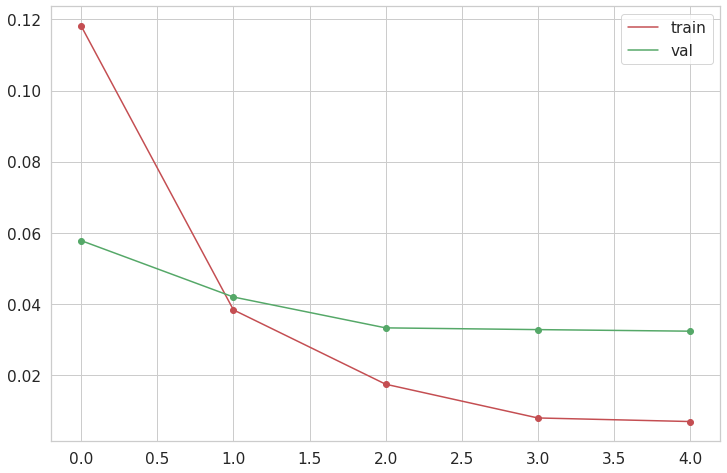

In [ ]:
import seaborn as sns

sns.set(style="whitegrid", font_scale=1.4)

# Построим график лосса при обучении и валидации

#Ваш код здесь
plt.figure(figsize=(12, 8))
plt.plot(losses['train'], 'r-', label="train")
plt.plot(losses['val'], 'g-', label="val")
plt.plot(losses['train'], 'ro')
plt.plot(losses['val'], 'go')
plt.legend()
plt.show()

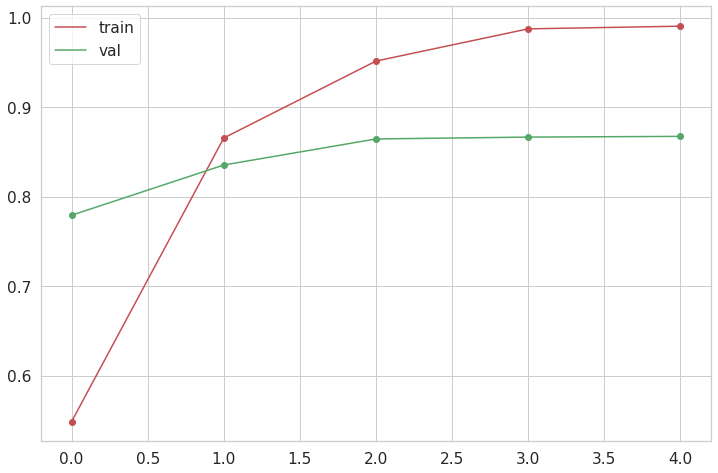

In [ ]:
import seaborn as sns

sns.set(style="whitegrid", font_scale=1.4)

# Построим график метрик качества при обучении и валидации

#Ваш код здесь
plt.figure(figsize=(12, 8))
plt.plot(accuracy_metric['train'], 'r-', label="train")
plt.plot(accuracy_metric['val'], 'g-', label="val")
plt.plot(accuracy_metric['train'], 'ro')
plt.plot(accuracy_metric['val'], 'go')
plt.legend()
plt.show()

<a id='Update_parameters_Undersampling_Alex_AdamW_summary'></a>

### Выводы из графиков и результатов расчетов

Качество модели довольно хорошее. 
Есть проблема с переобучением.
Скорость обучения довольно низка.
Лучше не использовать для предсказаний данную модель на этих данных

[Перейти к "Оглавлению"](#Main)

<a id='Update_parameters_Undersampling_Alex_SGD'></a>

## Модель AlexNet с одним полносвязным слоем и оптимизатором SGD

[Перейти к "Оглавлению"](#Main)

<a id='Update_parameters_Undersampling_Alex_SGD_learn'></a>

### Обучение модели

[Перейти к "Оглавлению"](#Main)

In [ ]:
model_alex = models.alexnet(pretrained=True)
model_alex

AlexNet(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(11, 11), stride=(4, 4), padding=(2, 2))
    (1): ReLU(inplace=True)
    (2): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Conv2d(64, 192, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (4): ReLU(inplace=True)
    (5): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (6): Conv2d(192, 384, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (7): ReLU(inplace=True)
    (8): Conv2d(384, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (9): ReLU(inplace=True)
    (10): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (avgpool): AdaptiveAvgPool2d(output_size=(6, 6))
  (classifier): Sequential(
    (0): Dropout(p=0.5, inplace=False)
    (1): Linear(in_features=9216, out_features=4096, bias=True)
 

In [ ]:
########################################################################################
# 0.9416 - on validation data - best
layers_to_unfreeze = 6

# Выключаем подсчет градиентов для слоев, которые не будем обучать
for param in model_alex.features[:-layers_to_unfreeze].parameters():
    param.requires_grad = False

# num_features - это размерность вектора фич, поступающего на вход FC-слою
num_features = 9216

# Заменяем Fully-Connected слой на наш линейный классификатор
model_alex.classifier = nn.Sequential(OrderedDict([
    ('batch_norm', nn.BatchNorm1d(num_features)),
    ('drop', nn.Dropout(p=0.3)),
    ('linerar1', nn.Linear(num_features, len(np.unique(train_val_labels))))
]))


# Использовать ли GPU
use_gpu = torch.cuda.is_available()
if use_gpu:
    model_alex = model_alex.cuda()

# В качестве cost function используем кросс-энтропию
loss_fn = nn.CrossEntropyLoss()

# В качестве оптимизатора - стохастический градиентный спуск
optimizer_ft = optim.SGD(model_alex.parameters(), lr=0.0001, momentum=0.99, 
                         nesterov=True)

# Умножает learning_rate на 0.1 каждые 5 эпох (это одна из эвристик, не было на лекциях)
exp_lr_scheduler = lr_scheduler.StepLR(optimizer_ft, step_size=4, gamma=0.1)
########################################################################################

In [ ]:
model_alex

AlexNet(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(11, 11), stride=(4, 4), padding=(2, 2))
    (1): ReLU(inplace=True)
    (2): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Conv2d(64, 192, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (4): ReLU(inplace=True)
    (5): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (6): Conv2d(192, 384, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (7): ReLU(inplace=True)
    (8): Conv2d(384, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (9): ReLU(inplace=True)
    (10): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (avgpool): AdaptiveAvgPool2d(output_size=(6, 6))
  (classifier): Sequential(
    (batch_norm): BatchNorm1d(9216, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    

In [ ]:
model_alex, losses, accuracy_metric = train_model(model_alex, loss_fn, optimizer_ft, exp_lr_scheduler, 
                                                  num_epochs=5)

Epoch::   0%|          | 0/5 [00:00<?, ?it/s]

/usr/local/lib/python3.7/dist-packages/torch/optim/lr_scheduler.py:134: UserWarning: Detected call of `lr_scheduler.step()` before `optimizer.step()`. In PyTorch 1.1.0 and later, you should call them in the opposite order: `optimizer.step()` before `lr_scheduler.step()`.  Failure to do this will result in PyTorch skipping the first value of the learning rate schedule. See more details at https://pytorch.org/docs/stable/optim.html#how-to-adjust-learning-rate
  "https://pytorch.org/docs/stable/optim.html#how-to-adjust-learning-rate", UserWarning)


train iter::   0%|          | 0/715 [00:00<?, ?it/s]

val iter::   0%|          | 0/238 [00:00<?, ?it/s]

train iter::   0%|          | 0/715 [00:00<?, ?it/s]

val iter::   0%|          | 0/238 [00:00<?, ?it/s]

train iter::   0%|          | 0/715 [00:00<?, ?it/s]

val iter::   0%|          | 0/238 [00:00<?, ?it/s]

train iter::   0%|          | 0/715 [00:00<?, ?it/s]

val iter::   0%|          | 0/238 [00:00<?, ?it/s]

train iter::   0%|          | 0/715 [00:00<?, ?it/s]

val iter::   0%|          | 0/238 [00:00<?, ?it/s]

Training complete in 11m 23s
Best val Acc: 0.809961


<a id='Update_parameters_Undersampling_Alex_SGD_draw'></a>

### Смотрим на графики для модели

[Перейти к "Оглавлению"](#Main)

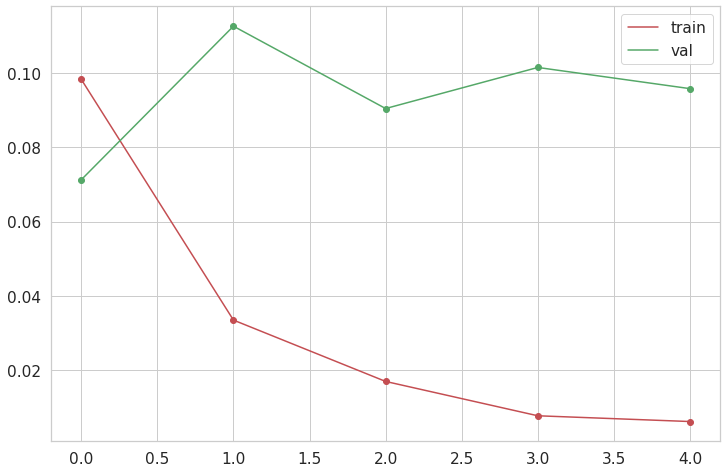

In [ ]:
import seaborn as sns

sns.set(style="whitegrid", font_scale=1.4)

# Построим график лосса при обучении и валидации

#Ваш код здесь
plt.figure(figsize=(12, 8))
plt.plot(losses['train'], 'r-', label="train")
plt.plot(losses['val'], 'g-', label="val")
plt.plot(losses['train'], 'ro')
plt.plot(losses['val'], 'go')
plt.legend()
plt.show()

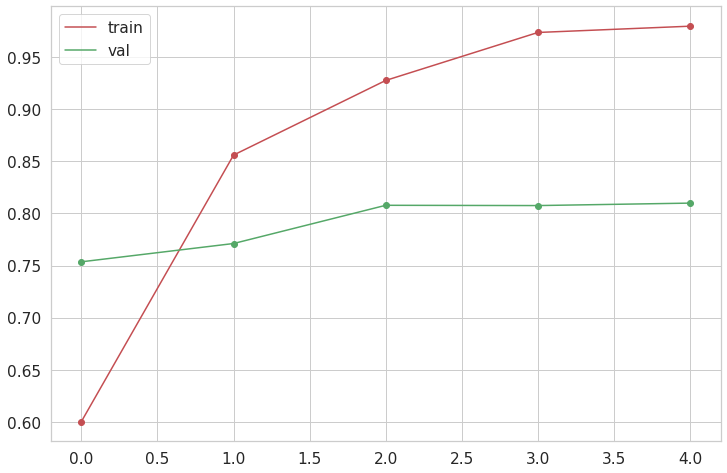

In [ ]:
import seaborn as sns

sns.set(style="whitegrid", font_scale=1.4)

# Построим график метрик качества при обучении и валидации

#Ваш код здесь
plt.figure(figsize=(12, 8))
plt.plot(accuracy_metric['train'], 'r-', label="train")
plt.plot(accuracy_metric['val'], 'g-', label="val")
plt.plot(accuracy_metric['train'], 'ro')
plt.plot(accuracy_metric['val'], 'go')
plt.legend()
plt.show()

<a id='Update_parameters_Undersampling_Alex_SGD_summary'></a>

### Выводы из графиков и результатов расчетов

Качество модели среднее. 
Есть проблема с переобучением.
Скорость обучения довольно низка.
Лучше не использовать для предсказаний данную модель на этих данных

[Перейти к "Оглавлению"](#Main)

<a id='Update_parameters_Undersampling_Alex_twofull'></a>

## Модель AlexNet с двумя полносвязными слоями

[Перейти к "Оглавлению"](#Main)

<a id='Update_parameters_Undersampling_Alex_twofull_learn'></a>

### Обучение модели

[Перейти к "Оглавлению"](#Main)

In [ ]:
model = models.alexnet(pretrained=True)
model

AlexNet(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(11, 11), stride=(4, 4), padding=(2, 2))
    (1): ReLU(inplace=True)
    (2): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Conv2d(64, 192, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (4): ReLU(inplace=True)
    (5): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (6): Conv2d(192, 384, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (7): ReLU(inplace=True)
    (8): Conv2d(384, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (9): ReLU(inplace=True)
    (10): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (avgpool): AdaptiveAvgPool2d(output_size=(6, 6))
  (classifier): Sequential(
    (0): Dropout(p=0.5, inplace=False)
    (1): Linear(in_features=9216, out_features=4096, bias=True)
 

In [ ]:
layers_to_unfreeze = 9

# Выключаем подсчет градиентов для слоев, которые не будем обучать
for param in model.features[:-layers_to_unfreeze].parameters():
    param.requires_grad = False


# num_features -- это размерность вектора фич, поступающего на вход FC-слою
num_features = 9216

# Заменяем Fully-Connected слой на наш линейный классификатор
model.classifier = nn.Sequential(OrderedDict([
    ('batch_norm', nn.BatchNorm1d(num_features)),
    ('drop1', nn.Dropout(p=0.5)),
    ('linerar1', nn.Linear(in_features=num_features, out_features=1000)),
    ('relu', nn.ReLU()),
    ('drop2', nn.Dropout(p=0.5, inplace=True)),
    ('linerar2', nn.Linear(in_features=1000, out_features=len(np.unique(train_val_labels))))
]))


# Использовать ли GPU
use_gpu = torch.cuda.is_available()
if use_gpu:
    model = model.cuda()

# В качестве cost function используем кросс-энтропию
loss_fn = nn.CrossEntropyLoss()

# В качестве оптимизатора - стохастический градиентный спуск
optimizer_ft = optim.Adam(model.parameters(), lr=1e-4)

# Умножает learning_rate на 0.1 каждые 4 эпох (это одна из эвристик, не было на лекциях)
exp_lr_scheduler = lr_scheduler.StepLR(optimizer_ft, step_size=2, gamma=0.1)

In [ ]:
model

AlexNet(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(11, 11), stride=(4, 4), padding=(2, 2))
    (1): ReLU(inplace=True)
    (2): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Conv2d(64, 192, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (4): ReLU(inplace=True)
    (5): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (6): Conv2d(192, 384, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (7): ReLU(inplace=True)
    (8): Conv2d(384, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (9): ReLU(inplace=True)
    (10): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (avgpool): AdaptiveAvgPool2d(output_size=(6, 6))
  (classifier): Sequential(
    (batch_norm): BatchNorm1d(9216, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    

In [ ]:
model, losses, accuracy_metric = train_model(model_alex, loss_fn, optimizer_ft, exp_lr_scheduler, 
                                                  num_epochs=3)

Epoch::   0%|          | 0/3 [00:00<?, ?it/s]

/usr/local/lib/python3.7/dist-packages/torch/optim/lr_scheduler.py:134: UserWarning: Detected call of `lr_scheduler.step()` before `optimizer.step()`. In PyTorch 1.1.0 and later, you should call them in the opposite order: `optimizer.step()` before `lr_scheduler.step()`.  Failure to do this will result in PyTorch skipping the first value of the learning rate schedule. See more details at https://pytorch.org/docs/stable/optim.html#how-to-adjust-learning-rate
  "https://pytorch.org/docs/stable/optim.html#how-to-adjust-learning-rate", UserWarning)


train iter::   0%|          | 0/715 [00:00<?, ?it/s]

val iter::   0%|          | 0/238 [00:00<?, ?it/s]

train iter::   0%|          | 0/715 [00:00<?, ?it/s]

val iter::   0%|          | 0/238 [00:00<?, ?it/s]

train iter::   0%|          | 0/715 [00:00<?, ?it/s]

val iter::   0%|          | 0/238 [00:00<?, ?it/s]

Training complete in 6m 43s
Best val Acc: 0.809436


<a id='Update_parameters_Undersampling_Alex_twofull_draw'></a>

### Смотрим на графики для модели

[Перейти к "Оглавлению"](#Main)

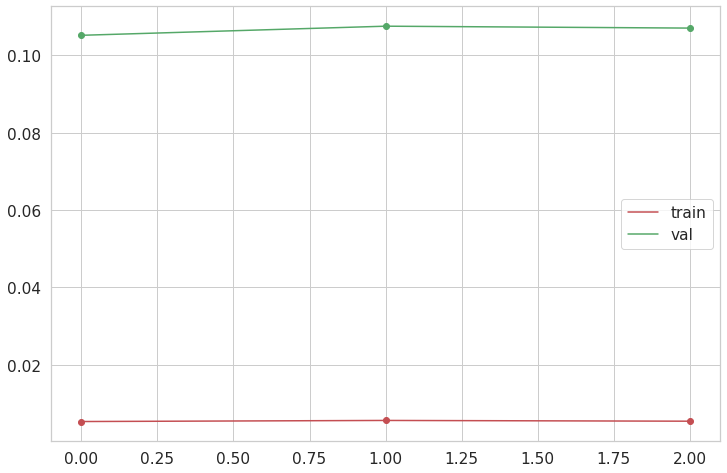

In [ ]:
import seaborn as sns

sns.set(style="whitegrid", font_scale=1.4)

# Построим график лосса при обучении и валидации

#Ваш код здесь
plt.figure(figsize=(12, 8))
plt.plot(losses['train'], 'r-', label="train")
plt.plot(losses['val'], 'g-', label="val")
plt.plot(losses['train'], 'ro')
plt.plot(losses['val'], 'go')
plt.legend()
plt.show()

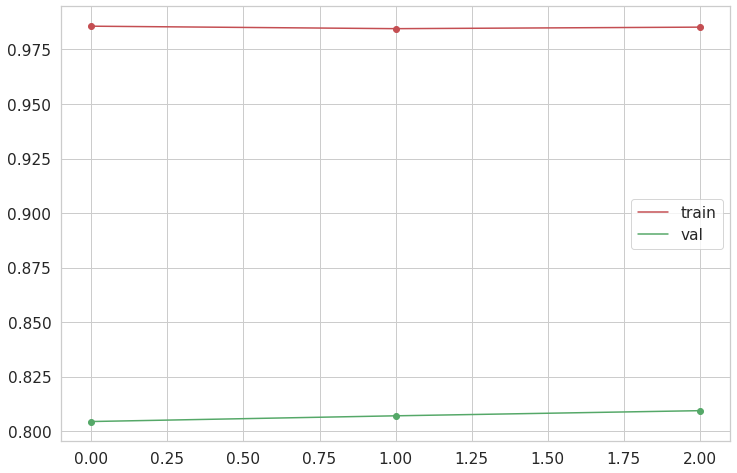

In [ ]:
import seaborn as sns

sns.set(style="whitegrid", font_scale=1.4)

# Построим график метрик качества при обучении и валидации

#Ваш код здесь
plt.figure(figsize=(12, 8))
plt.plot(accuracy_metric['train'], 'r-', label="train")
plt.plot(accuracy_metric['val'], 'g-', label="val")
plt.plot(accuracy_metric['train'], 'ro')
plt.plot(accuracy_metric['val'], 'go')
plt.legend()
plt.show()

<a id='Update_parameters_Undersampling_Alex_twofull_summary'></a>

### Выводы из графиков и результатов расчетов

Модель жесточайшим образом переобучается. Что с этим делать с таким набором данных неясно. Скорее всего - просто не использовать

[Перейти к "Оглавлению"](#Main)

# Выводы

- Скорее всего на используемых данных модели показывают свою максимальную способность

- Для улучшения качества стоит самостоятельно найти картинки и добавить в датасет. После чего провести обучение и так далее

- Еще вариант попробовать использовать torch.utils.data.WeightedRandomSampler. Возможно это что-то еще даст

Результат на kaggle: 0.98618 Yanin Yaroslav (user_name: yyvnew)   
Пользователь Stepic: Ярослав Янин (User ID: 28673601)

Дополнительные идеи по работе и/или по увеличению скора на kaggle (т.е. собственный опыт) прошу изложить в комментарии при проверке моей работы :)

PS: часть обучения проводил на kaggle. Это точно лучше чем Colab как минимум по ресурсам

# Различные варианты сред для использования
https://analyticsindiamag.com/5-alternatives-to-google-colab-for-data-scientists/

- https://aws.amazon.com/ru/sagemaker/pricing/
- https://visualstudio.microsoft.com/ru/vs/features/notebooks-at-microsoft/
- https://datalore.jetbrains.com/?source=google&medium=cpc&campaign=11652088470&gclid=Cj0KCQiAhf2MBhDNARIsAKXU5GRltEWGRdiQiFIH_aDBK_xwAQT1akBubtSEIBsh19rAB22g-Mh_jb8aAnc4EALw_wcB
- https://www.kaggle.com/yyvnew


Описание оптимизаторов на сайте: https://pytorch.org/docs/stable/optim.html

<a id='Predict'></a>

# Время предсказаний

[Перейти к "Оглавлению"](#Main)

In [ ]:
def evaluate(model):
    model.eval()
    
    runninig_correct = 0
    for data in dataloaders['val']:
        # получаем картинки и метки
        inputs, labels = data
        
        # переносим на gpu, если возможно
        if use_gpu:
            inputs = inputs.cuda()
            labels = labels.cuda()
            
        # forard pass
        output = model(inputs)
        _, predicted = torch.max(output, 1)
        
        runninig_correct += int(torch.sum(predicted == labels))
        
    return runninig_correct / dataset_sizes['val']

In [ ]:
def predict(model, test_loader):
    with torch.no_grad():
        logits = []
    
        for inputs in test_loader:
            inputs = inputs.to(DEVICE)
            model.eval()
            outputs = model(inputs).cpu()
            logits.append(outputs)
            
    probs = nn.functional.softmax(torch.cat(logits), dim=-1).numpy()
    return probs

In [ ]:
import pandas as pd


label_encoder = pickle.load(open("label_encoder.pkl", 'rb'))

test_dataset = SimpsonsDataset(test_files, mode="test")
test_loader = DataLoader(test_dataset, shuffle=False, batch_size=16)
probs = predict(model, test_loader)
preds = label_encoder.inverse_transform(np.argmax(probs, axis=1))
test_filenames = [path.name for path in test_dataset.files]
my_submit = pd.DataFrame({'Id': test_filenames, 'Expected': preds})
my_submit.head()

my_submit.to_csv('./simple_cnn_baseline.csv', index=False)